# ***Weakly Supervised Multiple Instance Learning for Prostate Cancer Histopathology (SICAPv2)***

# **Sprint 0: Descarga / importación del dataset**

Este bloque deja evidencia de origen de datos, trazabilidad y organización reproducible.

## 0.1 Definición de rutas base

In [ ]:
import os
import shutil

BASE_PATH = "/content"
DATA_ROOT = os.path.join(BASE_PATH, "sicapv2_data")
DATASET_PATH = os.path.join(DATA_ROOT, "SICAPv2")
META_PATH = os.path.join(DATASET_PATH, "metadata")

os.makedirs(META_PATH, exist_ok=True)

## 0.2 Importación del dataset

In [ ]:
ZIP_MAIN = "/content/sicapv2.zip"

if not os.path.exists(ZIP_MAIN):
    print("Archivo ZIP principal NO existe. Descargando...")

    # Enlace de descarga para el archivo ZIP
    download_url = "https://data.mendeley.com/public-api/zip/9xxm58dvs3/download/1"

    # Descargar el archivo ZIP y guardarlo como sicapv2.zip
    !wget -O $ZIP_MAIN $download_url
else:
    print("Archivo ZIP principal ya existe → NO se descarga.")


Archivo ZIP principal NO existe. Descargando...
--2026-02-02 22:42:38--  https://data.mendeley.com/public-api/zip/9xxm58dvs3/download/1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9xxm58dvs3-1.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECYaCWV1LXdlc3QtMSJHMEUCIGG1daQiXEafFAlhlu3tpqm0yUk77r2N7ezJGH3%2FogDKAiEA2i5tmF2rzGEm02rWMNikoWZsmyT1SGGqqAzhZuc4JjEqlQUI7%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAEGgwzNjcxNDczODM4MjUiDI3bcmU3ysIYbiB%2F8SrpBINXglReQci0OPFjKfV6bD1%2FMMPMRuiV525yb0loV%2FU7dh228T4fVxDx9qv5aYeKQdeaxoWxs24vK0L16%2FH4vlQ%2F04I1A9TAEpKyHO2DXIWwJygQLapZhMCi0VRKfo6FY9IAqdmuI8AuNlvK6XrEvZ6cx4dgoT%2BiRDHF2CrS6jFO4AHFoNdeRYax5AFmcyrMwNEYFns0UshRmQgksbBxskxbtpZG9YnxfLngXcs9p78HOVh7layY60Twe8TYWyVARsaUinspoG54NhltNbKNbgOr8Ffyrnq%2F5pqMUtg%2B7b

### Descomprimimos el Archivo ZIP principal

In [ ]:
INTERMEDIATE_DIR = "/content/intermediate_data"
!unzip -q $ZIP_MAIN -d $INTERMEDIATE_DIR


In [ ]:
# Listar los contenidos para verificar
!ls /content/intermediate_data

SICAPv2.zip


## 0.3 Descomprimir el Archivo ZIP Anidado (SICAPv2.zip)

####"/content/intermediate_data/SICAPv2.../SICAPv2.zip"

In [ ]:
nested_zip = None
for root, _, files in os.walk(INTERMEDIATE_DIR):
    for f in files:
        if f.endswith(".zip"):
            nested_zip = os.path.join(root, f)
            break

assert nested_zip is not None, "ZIP SICAPv2 no encontrado"

!unzip -q "$nested_zip" -d $DATA_ROOT


In [ ]:
assert os.path.exists(DATASET_PATH)
assert len(os.listdir(DATASET_PATH)) > 0


## 0.4. Limpiar y Organizar el Espacio

In [ ]:
if os.path.exists(ZIP_MAIN):
    print("Eliminando ZIP principal...")

    # Eliminar el archivo ZIP principal
    !rm $ZIP_MAIN

if os.path.exists(INTERMEDIATE_DIR):
    print("Eliminando carpeta intermedia...")

    # Eliminar el directorio intermedio y su contenido de forma recursiva
    !rm -r $INTERMEDIATE_DIR


Eliminando ZIP principal...
Eliminando carpeta intermedia...


In [ ]:
print("\nContenido de /content:")
!ls /content


Contenido de /content:
sample_data  sicapv2_data


# **Sprint 1: Entendimiento y organización del dataset SICAPv2**

Propósito del sprint

1. Verificar la estructura real del dataset descargado
2. Identificar qué información tenemos (imágenes, máscaras, labels WSI)
3. Preparar una organización coherente para Aprendizaje con Múltiples Instancias (MIL)
4. Dejar trazabilidad clara para el documento de tesis

## 1.1 Verificación de la estructura del dataset

Primero, inspeccionamos qué hay realmente en disco. Esto es clave porque SICAPv2 no es homogéneo entre Kaggle y Mendeley.

In [ ]:
def printTree(path, level=2):
    for root, dirs, files in os.walk(path):
        depth = root.replace(path, "").count(os.sep)
        if depth > level:
            continue
        indent = " " * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        for f in files[:5]:
            print(f"{indent}    {f}")


In [ ]:
printTree(DATASET_PATH, level=3)

SICAPv2/
    wsi_labels.xlsx
    readme.txt
    images/
        16B0028813_Block_Region_5_6_2_xini_11482_yini_109499.jpg
        18B0001966H_Block_Region_2_26_22_xini_34502_yini_29019.jpg
        16B0028817_Block_Region_17_12_18_xini_37872_yini_14347.jpg
        18B0005478I_Block_Region_2_8_2_xini_9804_yini_143022.jpg
        16B0022616_Block_Region_0_12_7_xini_11079_yini_153899.jpg
    metadata/
    partition/
        Validation/
            Val3/
                TestCribfriform.xlsx
                Train.xlsx
                Test.xlsx
                TrainCribfriform.xlsx
            Val4/
                TestCribfriform.xlsx
                Train.xlsx
                Test.xlsx
                TrainCribfriform.xlsx
            Val1/
                TestCribfriform.xlsx
                Train.xlsx
                Test.xlsx
                TrainCribfriform.xlsx
            Val2/
                TestCribfriform.xlsx
                Train.xlsx
                Test.xlsx
                Tra

## 1.2 Definición de Paths

In [ ]:
IMAGES_DIR = os.path.join(DATASET_PATH, "images")
MASKS_DIR  = os.path.join(DATASET_PATH, "masks")
PARTITION_DIR = os.path.join(DATASET_PATH, "partition")


In [ ]:
for p in [IMAGES_DIR, MASKS_DIR, PARTITION_DIR]:
    print(p, "→", os.path.exists(p))

/content/sicapv2_data/SICAPv2/images → True
/content/sicapv2_data/SICAPv2/masks → True
/content/sicapv2_data/SICAPv2/partition → True


## 1.3 Conteo y verificación básica de datos

In [ ]:
def countFiles(path, ext=".jpg"):
    return len([f for f in os.listdir(path) if f.lower().endswith(ext)])

In [ ]:
print("Conteo global de patches")
stats = {
    "total_images": countFiles(IMAGES_DIR),
    "total_masks": countFiles(MASKS_DIR)
}

stats

Conteo global de patches


{'total_images': 18783, 'total_masks': 18783}

## 1.4 Consistencia imagen–máscara

In [ ]:
imagesSet = set(os.listdir(IMAGES_DIR))
masksSet  = set(os.listdir(MASKS_DIR))

print("Imágenes sin máscara:", len(imagesSet - masksSet))
print("Máscaras sin imagen:", len(masksSet - imagesSet))


Imágenes sin máscara: 0
Máscaras sin imagen: 0


## 1.5 Particiones oficiales

In [ ]:
printTree(PARTITION_DIR, level=3)

partition/
    Validation/
        Val3/
            TestCribfriform.xlsx
            Train.xlsx
            Test.xlsx
            TrainCribfriform.xlsx
        Val4/
            TestCribfriform.xlsx
            Train.xlsx
            Test.xlsx
            TrainCribfriform.xlsx
        Val1/
            TestCribfriform.xlsx
            Train.xlsx
            Test.xlsx
            TrainCribfriform.xlsx
        Val2/
            TestCribfriform.xlsx
            Train.xlsx
            Test.xlsx
            TrainCribfriform.xlsx
    Test/
        TestCribfriform.xlsx
        Train.xlsx
        Test.xlsx
        TrainCribfriform.xlsx


## 1.6 Verificamos qué contienen los Train.xlsx / Test.xlsx

In [ ]:
import pandas as pd

samplePartition = pd.read_excel(
    os.path.join(PARTITION_DIR, "Validation", "Val1", "Train.xlsx")
)

samplePartition.head()

,image_name,NC,G3,G4,G5,G4C
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,0,0,0,1,0


## 1.7 Verificamos si hay solapamiento entre folds (anti data leakage)

In [ ]:
trainVal1 = set(
    pd.read_excel(os.path.join(PARTITION_DIR, "Validation", "Val1", "Train.xlsx"))["image_name"].apply(lambda x: x.split('_Block')[0])
)

testVal1 = set(
    pd.read_excel(os.path.join(PARTITION_DIR, "Validation", "Val1", "Test.xlsx"))["image_name"].apply(lambda x: x.split('_Block')[0])
)

print("Solapamiento Train/Test:", len(trainVal1 & testVal1))

Solapamiento Train/Test: 0


## 1.8 Conteo de WSIs por partición

In [ ]:
def countWSIs(path):
    df = pd.read_excel(path)
    wsiIds = df["image_name"].apply(lambda x: x.split("_Block")[0])
    return wsiIds.nunique()

In [ ]:
for fold in ["Val1", "Val2", "Val3", "Val4"]:
    trainPath = os.path.join(PARTITION_DIR, "Validation", fold, "Train.xlsx")
    testPath  = os.path.join(PARTITION_DIR, "Validation", fold, "Test.xlsx")

    print(
        fold,
        "Train WSIs:", countWSIs(trainPath),
        "\nTest WSIs:", countWSIs(testPath)
    )


Val1 Train WSIs: 95 
Test WSIs: 29
Val2 Train WSIs: 97 
Test WSIs: 27
Val3 Train WSIs: 94 
Test WSIs: 30
Val4 Train WSIs: 86 
Test WSIs: 38


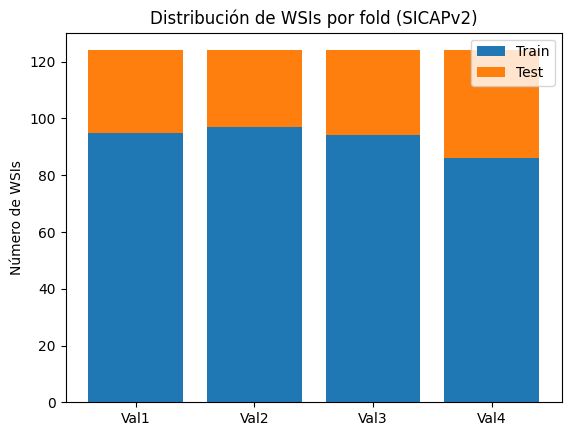

In [ ]:
import matplotlib.pyplot as plt

folds = ["Val1", "Val2", "Val3", "Val4"]
trainWsis = [95, 97, 94, 86]
testWsis  = [29, 27, 30, 38]

x = range(len(folds))

plt.bar(x, trainWsis, label="Train")
plt.bar(x, testWsis, bottom=trainWsis, label="Test")
plt.xticks(x, folds)
plt.ylabel("Número de WSIs")
plt.title("Distribución de WSIs por fold (SICAPv2)")
plt.legend()
plt.show()


### **Nota**:
Las máscaras de segmentación están disponibles en SICAPv2, pero NO se utilizan para el entrenamiento del modelo MIL.

Se emplean únicamente para análisis exploratorio y validación interpretativa.

El dataset SICAPv2 proporciona un conjunto de particiones oficiales para validación cruzada (Val1–Val4), las cuales fueron empleadas para el desarrollo y evaluación de los modelos. Adicionalmente, el dataset incluye un conjunto de prueba independiente (partition/Test), el cual se reserva como test hold-out final y no se utiliza durante el proceso de ajuste ni selección de modelos

# **Sprint 2: Construcción del dataset_manifest.csv**

### **Objetivo del Sprint 2**

Construir un manifest único, consistente y trazable, donde:

- 1 fila = 1 parche
- Cada parche queda asociado a:
  * su WSI
  * su fold (Val1–Val4)
  * su split (train / test)
  * su ruta a imagen
  * su ruta a máscara
  * su label clínico global (WSI-level)

Este archivo será:
- la base de los bags MIL
- la fuente para EDA, entrenamiento y evaluación

## Esquema propuesto del `dataset_manifest.csv`

| Columna | Descripción |
| :--- | :--- |
| **imageName** | Nombre del parche |
| **imagePath** | Ruta absoluta o relativa a la imagen |
| **maskPath** | Ruta a la máscara correspondiente |
| **maskExists** | Indica si la máscara existe (True/False) |
| **wsiId** | Identificador único de la WSI |
| **fold** | Fold de validación cruzada (Val1–Val4) |
| **split** | Subconjunto: train / test |
| **gleasonPrimary** | Gleason Score primario a nivel WSI |
| **gleasonSecondary** | Gleason Score secundario a nivel WSI |
| **isup** | Grado ISUP derivado a partir de Gleason Primary + Secondary |
| **nc** | Parche no canceroso (Non-Cancerous) |
| **g3** | Gleason pattern 3 (patch-level) |
| **g4** | Gleason pattern 4 (patch-level) |
| **g5** | Gleason pattern 5 (patch-level) |
| **g4c** | Gleason pattern 4 cribriforme (subtipo agresivo) |


El grado ISUP se deriva una única vez a nivel WSI durante la carga de los labels clínicos, y posteriormente se propaga a todos los parches asociados a dicha WSI, garantizando coherencia WSI-level y evitando inconsistencias a nivel patch.



### Nota
Los labels NO son patch-level, solo se registran por trazabilidad.

## 2.1 Cargar labels globales (WSI-level)

In [ ]:
import pandas as pd
import os

wsiLabelsPath = os.path.join(DATASET_PATH, "wsi_labels.xlsx")
wsiLabelsDf = pd.read_excel(wsiLabelsPath)
wsiLabelsDf.head()


,slide_id,patient_id,Gleason_primary,Gleason_secondary
0,16B0001851,667360,4,5
1,16B0003388,325687,4,4
2,16B0003394,747184,3,3
3,16B0006668,14107,5,5
4,16B0006669,14107,5,5


In [ ]:
wsiLabelsDf.columns

Index(['slide_id', 'patient_id', 'Gleason_primary', 'Gleason_secondary'], dtype='object')

In [ ]:
wsiLabelsDf = wsiLabelsDf.rename(columns={
    "slide_id": "WSI_ID"
})

wsiLabelsDf.head()

,WSI_ID,patient_id,Gleason_primary,Gleason_secondary
0,16B0001851,667360,4,5
1,16B0003388,325687,4,4
2,16B0003394,747184,3,3
3,16B0006668,14107,5,5
4,16B0006669,14107,5,5


In [ ]:
wsiLabelsDf.columns

Index(['WSI_ID', 'patient_id', 'Gleason_primary', 'Gleason_secondary'], dtype='object')

## 2.2 Funciones auxiliares clave

In [ ]:
def extractWsiId(imageName: str) -> str:
    """
    Extrae el identificador de la WSI a partir del nombre del parche.
    """
    return imageName.split("_Block")[0]


In [ ]:
def buildImagePath(imageName):
    return os.path.join(IMAGES_DIR, imageName)

def buildMaskPath(imageName):
    return os.path.join(MASKS_DIR, imageName)


In [ ]:
def computeISUP(gleasonPrimary, gleasonSecondary):
    total = gleasonPrimary + gleasonSecondary

    if total <= 6:
        return 1
    elif total == 7 and gleasonPrimary == 3:
        return 2
    elif total == 7 and gleasonPrimary == 4:
        return 3
    elif total == 8:
        return 4
    else:
        return 5


## 2.3 Procesar un fold (función central)

### precalcular ISUP

In [ ]:
wsiLabelsDf["ISUP"] = wsiLabelsDf.apply(
    lambda r: computeISUP(r["Gleason_primary"], r["Gleason_secondary"]),
    axis=1
)

### Construir el diccionario clínico (YA con ISUP)

In [ ]:
wsiLabelDict = (
    wsiLabelsDf
    .set_index("WSI_ID")
    .to_dict(orient="index")
)


In [ ]:
def processFold(foldName):
    foldRows = []
    foldPath = os.path.join(PARTITION_DIR, "Validation", foldName)

    for split in ["Train", "Test"]:
        splitDf = pd.read_excel(os.path.join(foldPath, f"{split}.xlsx"))

        for _, row in splitDf.iterrows():
            imageName = row["image_name"]
            wsiId = extractWsiId(imageName)

            foldRows.append({
                "imageName": imageName,
                "imagePath": buildImagePath(imageName),
                "maskPath": buildMaskPath(imageName),
                "maskExists": os.path.exists(buildMaskPath(imageName)),
                "wsiId": wsiId,
                "fold": foldName,
                "split": split.lower(),

                # 🔒 Labels WSI-level (constantes)
                "gleasonPrimary": int(wsiLabelDict[wsiId]["Gleason_primary"]),
                "gleasonSecondary": int(wsiLabelDict[wsiId]["Gleason_secondary"]),
                "isup": int(wsiLabelDict[wsiId]["ISUP"]),

                # 🎯 Patch-level (desde partition)
                "nc": row["NC"],
                "g3": row["G3"],
                "g4": row["G4"],
                "g5": row["G5"],
                "g4c": row["G4C"],
            })

    return pd.DataFrame(foldRows)


## 2.4 Construcción completa del manifest

In [ ]:
allFolds = []

for fold in ["Val1", "Val2", "Val3", "Val4"]:
    print(f"Procesando {fold}...")
    allFolds.append(processFold(fold))

manifestDf = pd.concat(allFolds, ignore_index=True)
manifestDf.head()


Procesando Val1...
Procesando Val2...
Procesando Val3...
Procesando Val4...


,imageName,imagePath,maskPath,maskExists,wsiId,fold,split,gleasonPrimary,gleasonSecondary,isup,nc,g3,g4,g5,g4c
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0


## 2.5 Validaciones críticas

In [ ]:
manifestDf["isup"].apply(type).value_counts()

,count
isup,
<class 'int'>,39836


In [ ]:
manifestDf.groupby("wsiId")["isup"].nunique().max()

1

In [ ]:
manifestDf.shape

(39836, 15)

### Integridad de máscaras

In [ ]:
manifestDf["maskExists"].value_counts()

,count
maskExists,
True,39836


### Sin valores nulos

In [ ]:
manifestDf.isna().sum()


,0
imageName,0
imagePath,0
maskPath,0
maskExists,0
wsiId,0
fold,0
split,0
gleasonPrimary,0
gleasonSecondary,0
isup,0


### Coherencia WSI–fold

In [ ]:
manifestDf.groupby(["fold", "split"])["wsiId"].nunique()

fold  split
Val1  test     29
      train    95
Val2  test     27
      train    97
Val3  test     30
      train    94
Val4  test     38
      train    86
Name: wsiId, dtype: int64

## 2.6 Guardar el manifest

In [ ]:
manifestPath = os.path.join(META_PATH, "dataset_manifest.csv")
manifestDf.to_csv(manifestPath, index=False)

print("Manifest guardado en:", manifestPath)


Manifest guardado en: /content/sicapv2_data/SICAPv2/metadata/dataset_manifest.csv


Todas las validaciones críticas del manifest fueron superadas, incluyendo coherencia WSI-level de los labels clínicos, integridad de máscaras, ausencia de valores nulos y correcta separación por fold y split. El archivo dataset_manifest.csv se considera estable y se utiliza como única fuente de verdad para los sprints posteriores.

# **Sprint 3 Preparación MIL (Bag Construction)**

## **Objetivo del Sprint 3**

Transformar el dataset_manifest.csv en una estructura de Bags MIL, donde:

- Bag = WSI
- Instancias = patches
- Label del bag = ISUP
- Separación estricta por fold y split

Este sprint no entrena modelos. Solo prepara datos correctamente.

In [ ]:
import pandas as pd

MANIFEST_PATH = "/content/sicapv2_data/SICAPv2/metadata/dataset_manifest.csv"

manifestDf = pd.read_csv(MANIFEST_PATH)

manifestDf.shape
manifestDf.head()


,imageName,imagePath,maskPath,maskExists,wsiId,fold,split,gleasonPrimary,gleasonSecondary,isup,nc,g3,g4,g5,g4c
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0


## 3.2 Definición formal de un Bag MIL

A nivel conceptual:

- Un bag corresponde a una WSI y contiene múltiples instancias (***patches***).
- El bag hereda el label clínico de la WSI (ISUP), mientras que las instancias pueden tener etiquetas locales (***NC, G3, G4, G5, G4C***).

## 3.3 Construcción de Bags MIL

In [ ]:
from collections import defaultdict

def buildMilBags(manifestDf):
    bags = []

    grouped = manifestDf.groupby(["fold", "split", "wsiId"])

    for (fold, split, wsiId), group in grouped:

        bag = {
            "wsiId": wsiId,
            "fold": fold,
            "split": split,
            "isup": int(group["isup"].iloc[0]),
            "gleasonPrimary": int(group["gleasonPrimary"].iloc[0]),
            "gleasonSecondary": int(group["gleasonSecondary"].iloc[0]),
            "instances": []
        }

        for _, row in group.iterrows():
            instance = {
                "imagePath": row["imagePath"],
                "maskPath": row["maskPath"],
                "patchLabel": {
                    "nc": row["nc"],
                    "g3": row["g3"],
                    "g4": row["g4"],
                    "g5": row["g5"],
                    "g4c": row["g4c"]
                }
            }
            bag["instances"].append(instance)

        bags.append(bag)

    return bags


In [ ]:
milBags = buildMilBags(manifestDf)

len(milBags)


496

El número de bags debe coincidir con:

In [ ]:
manifestDf[["fold", "split", "wsiId"]].drop_duplicates().shape[0]


496

## 3.5 Validaciones críticas

In [ ]:
assert all(len(bag["instances"]) > 0 for bag in milBags)

## 3.5.2 Un bag no mezcla splits

In [ ]:
for bag in milBags:
    assert bag["split"] in ["train", "test"]


## 3.5.3 Un bag tiene un solo label ISUP

In [ ]:
for bag in milBags:
    assert isinstance(bag["isup"], int)


## 3.6 Estadísticas MIL

In [ ]:
import numpy as np

bagSizes = [len(bag["instances"]) for bag in milBags]

print("Número de bags:", len(milBags))
print("Instancias por bag (min):", np.min(bagSizes))
print("Instancias por bag (max):", np.max(bagSizes))
print("Instancias por bag (mean):", np.mean(bagSizes))


Número de bags: 496
Instancias por bag (min): 7
Instancias por bag (max): 347
Instancias por bag (mean): 80.31451612903226


## 3.7 Separación final por fold y split

In [ ]:
def splitBagsByFold(milBags, foldName):
    trainBags = [b for b in milBags if b["fold"] == foldName and b["split"] == "train"]
    testBags  = [b for b in milBags if b["fold"] == foldName and b["split"] == "test"]
    return trainBags, testBags


In [ ]:
trainVal1, testVal1 = splitBagsByFold(milBags, "Val1")

len(trainVal1), len(testVal1)


(95, 29)

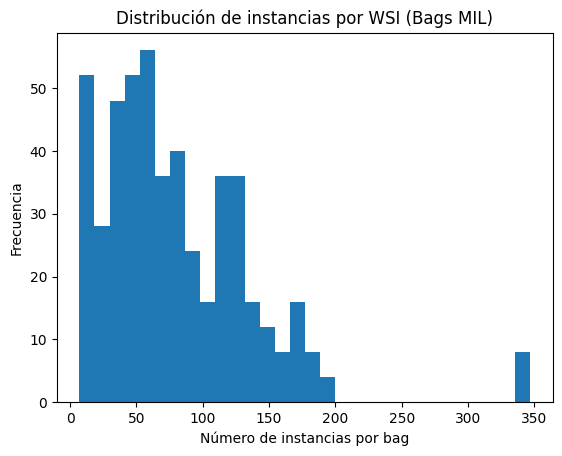

In [ ]:
bagSizes = [len(bag["instances"]) for bag in milBags]

plt.figure()
plt.hist(bagSizes, bins=30)
plt.xlabel("Número de instancias por bag")
plt.ylabel("Frecuencia")
plt.title("Distribución de instancias por WSI (Bags MIL)")
plt.show()

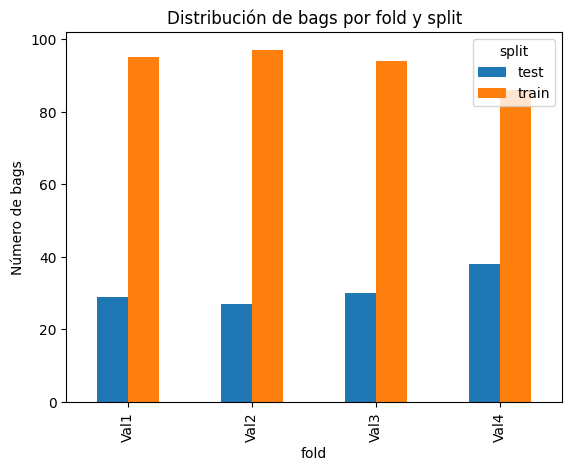

In [ ]:
bagsDf = pd.DataFrame([
    {"fold": b["fold"], "split": b["split"]}
    for b in milBags
])

bagsDf.groupby(["fold", "split"]).size().unstack().plot(kind="bar")
plt.ylabel("Número de bags")
plt.title("Distribución de bags por fold y split")
plt.show()


## **Construcción y validación de Bags MIL**

A partir del dataset_manifest.csv, se construyó una representación basada en Aprendizaje de Instancias Múltiples (MIL), donde cada Whole Slide Image (WSI) corresponde a un bag y cada parche histopatológico a una instancia. El label clínico del bag se definió a partir del grado ISUP asociado a la WSI, mientras que las instancias conservan información local relacionada con la distribución de patrones histológicos (NC, G3, G4, G5 y G4C).

Se validó que:

- Cada bag contiene exclusivamente instancias pertenecientes a una única WSI.
- No existe solapamiento entre conjuntos de entrenamiento y prueba.
- Todos los bags presentan un único label ISUP.
- No existen instancias huérfanas ni bags vacíos.

El conjunto final contiene $496$ bags, con un número variable de instancias por bag, lo cual refleja la heterogeneidad espacial propia de las imágenes histopatológicas y justifica el uso de modelos MIL con mecanismos de agregación basados en atención.

# **Sprint 4 Feature Extraction (Backbone CNN)**

## **Objetivo**

Extraer representaciones profundas (embeddings) de cada parche histopatológico mediante una CNN preentrenada. Estos embeddings se utilizarán posteriormente como instancias en un modelo de Multiple Instance Learning (MIL).

En este sprint no se realiza MIL ni agregación por WSI. Se trata de una etapa clásica de computer vision con transfer learning, cuyo objetivo es obtener descriptores robustos a nivel de parche.


## **1. Decisiones metodológicas (justificación técnica)**

### 1.1 Backbone CNN

- Arquitectura: ResNet50 preentrenada en ImageNet
- Pesos: preentrenada en ImageNet

Justificación (tesis-ready):
  - Arquitectura profunda con bloques residuales que facilitan el entrenamiento estable
  - Amplio uso en tareas de histopatología digital
  - Buen equilibrio entre capacidad representacional y costo computacional
  - Frecuentemente utilizada como baseline en enfoques MIL

## **2. Estrategia de entrenamiento**

**Backbone congelado (feature extractor)**

La red convolucional se utiliza únicamente como extractor de características:
  - No se realiza fine-tuning en esta etapa
  - Todos los parámetros del backbone permanecen congelados

Razones:
  - Dataset relativamente pequeño en número de WSIs
  - Riesgo alto de sobreajuste
  - Práctica estándar en pipelines MIL para histopatología

## **Sprint 4.1 — Implementación paso a paso**

### 4.1.1 Imports y configuración base

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", DEVICE)

Using device: cuda


In [ ]:
manifestDf.head()

,imageName,imagePath,maskPath,maskExists,wsiId,fold,split,gleasonPrimary,gleasonSecondary,isup,nc,g3,g4,g5,g4c
0,16B0001851_Block_Region_1_0_0_xini_6803_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
1,16B0001851_Block_Region_1_0_1_xini_7827_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
2,16B0001851_Block_Region_1_0_2_xini_8851_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
3,16B0001851_Block_Region_1_0_3_xini_9875_yini_5...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0
4,16B0001851_Block_Region_1_1_0_xini_6803_yini_6...,/content/sicapv2_data/SICAPv2/images/16B000185...,/content/sicapv2_data/SICAPv2/masks/16B0001851...,True,16B0001851,Val1,train,4,5,5,0,0,0,1,0


### 4.1.2 Transformaciones de imagen

Muy importante: consistentes con ImageNet.

In [ ]:
imageTransforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])


📌 Esta normalización es obligatoria para garantizar compatibilidad con los pesos de ImageNet.

### 4.1.3 Dataset de parches

Se utiliza directamente el archivo `dataset_manifest.csv`, que contiene la información de cada parche

In [ ]:
class PatchDataset(Dataset):
    def __init__(self, manifestDf, transform=None):
        self.df = manifestDf.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(row["imagePath"]).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return {
            "image": image,
            "wsiId": row["wsiId"],
            "isup": int(row["isup"]),
            "fold": row["fold"],
            "split": row["split"]
        }

### 4.1.4 DataLoader

In [ ]:
patchDataset = PatchDataset(manifestDf, transform=imageTransforms)

patchLoader = DataLoader(
    patchDataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

### 4.1.5 Backbone ResNet50 (feature extractor)

In [ ]:
resnet = models.resnet50(
    weights=models.ResNet50_Weights.IMAGENET1K_V1
)

featureExtractor = nn.Sequential(*list(resnet.children())[:-1])

for param in featureExtractor.parameters():
    param.requires_grad = False

featureExtractor = featureExtractor.to(DEVICE)
featureExtractor.eval()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


### 4.1.6 Validación de dimensionalidad

In [ ]:
batch = next(iter(patchLoader))
imgs = batch["image"].to(DEVICE)

with torch.no_grad():
    out = featureExtractor(imgs)

print("Salida backbone:", out.shape)

out = out.squeeze(-1).squeeze(-1)
print("Salida flatten:", out.shape)

Salida backbone: torch.Size([32, 2048, 1, 1])
Salida flatten: torch.Size([32, 2048])


### 4.1.7 Extracción de embeddings (PATCH-LEVEL)

In [ ]:
def extractFeatures(dataloader, model, device):
    features = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Extracting features"):
            imgs = batch["image"].to(device)
            out = model(imgs).squeeze(-1).squeeze(-1)

            for i in range(out.shape[0]):
                features.append({
                    "embedding": out[i].cpu().numpy(),
                    "wsiId": batch["wsiId"][i],
                    "isup": int(batch["isup"][i].item()),
                    "fold": batch["fold"][i],
                    "split": batch["split"][i],
                })

    return features

In [ ]:
features = extractFeatures(patchLoader, featureExtractor, DEVICE)

Extracting features: 100%|██████████| 1245/1245 [04:04<00:00,  5.09it/s]


### 4.1.8 Validaciones finales

In [ ]:
featuresDf = pd.DataFrame(features)

assert len(featuresDf) == len(manifestDf)
assert featuresDf.groupby("wsiId")["isup"].nunique().max() == 1
assert featuresDf.groupby("wsiId")["isup"].nunique().min() == 1

np.isnan(np.vstack(featuresDf["embedding"].values)).sum()

np.int64(0)

In [ ]:
print("Embeddings:", len(features))
print("Manifest rows:", len(manifestDf))
assert len(features) == len(manifestDf)


Embeddings: 39836
Manifest rows: 39836


#### Dimensión del embedding

In [ ]:
features[0]["embedding"].shape
# (2048,)

(2048,)

#### Coherencia WSI–ISUP

In [ ]:
featuresDf.groupby("wsiId")["isup"].nunique().max()
# ✅ 1

1

In [ ]:
featuresDf.groupby("wsiId")["isup"].nunique().min()
# ✅ 1

1

In [ ]:
FEATURES_PATH = "/content/sicapv2_data/SICAPv2/metadata/patch_embeddings.pkl"
pd.to_pickle(featuresDf, FEATURES_PATH)
print("Patch embeddings guardados en:", FEATURES_PATH)

Patch embeddings guardados en: /content/sicapv2_data/SICAPv2/metadata/patch_embeddings.pkl


Debido al número de instancias por WSI y a la dimensionalidad de los embeddings, los bags MIL no se materializan completamente en memoria en esta etapa. En su lugar, los embeddings se almacenan a nivel patch y los bags se construyen dinámicamente durante el entrenamiento, siguiendo prácticas estándar en aprendizaje por instancias múltiples para histopatología digital.

Los embeddings se almacenan a nivel de parche, junto con sus metadatos (WSI, ISUP, fold y split).

### 4.1.9 Construcción lógica de bags MIL (conceptual)

Debido al tamaño de los embeddings y al número de instancias por WSI, los bags MIL no se materializan completamente en memoria. En su lugar, los embeddings se almacenan a nivel patch y los bags se construyen dinámicamente durante el entrenamiento, siguiendo prácticas estándar en MIL para histopatología.

### 4.1.10 Construcción lógica de bags MIL (conceptual)

En esta etapa no se materializan explícitamente los bags MIL en memoria.

Conceptualmente, cada bag corresponde al conjunto de embeddings de parches asociados a un mismo wsiId, junto con su etiqueta ISUP. Durante el entrenamiento del modelo MIL (Sprint 5), los bags se construyen dinámicamente agrupando los embeddings almacenados a nivel de parche.

Esta estrategia:

- Reduce significativamente el consumo de memoria
- Escala mejor a WSIs con miles de parches
- Sigue prácticas estándar en MIL aplicado a histopatología digital

### 4.1.11 Análisis exploratorio opcional (PCA)

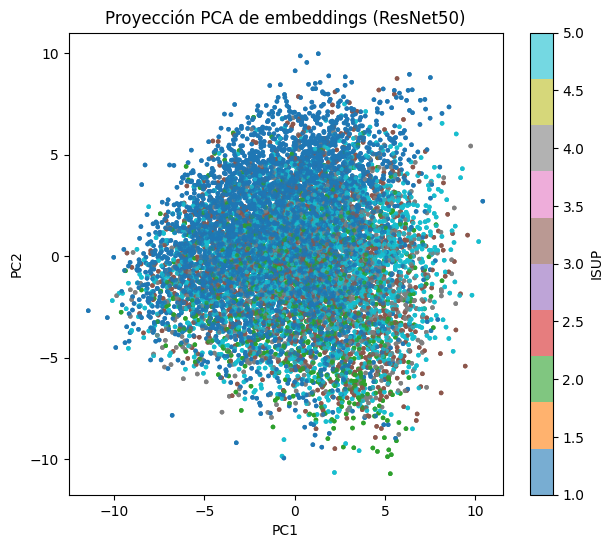

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.vstack(featuresDf["embedding"].values)
y = featuresDf["isup"].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,6))
scatter = plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap="tab10",
    s=5,
    alpha=0.6
)
plt.colorbar(scatter, label="ISUP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA de embeddings (ResNet50)")
plt.show()

Este análisis tiene fines exclusivamente exploratorios. No se espera una separación clara entre clases a nivel de parche; sin embargo, la proyección sugiere que las representaciones extraídas capturan información histopatológica relevante que será explotada por el modelo MIL en etapas posteriores.

# **Sprint 5 — MIL Dataset + Modelos**

Construir un Dataset MIL que:

- No materialice bags en memoria
- Agrupe dinámicamente patches → WSI
- Devuelva una bag por iteración
- Sea escalable y estable en RAM

## Decisión metodológica clave (para el documento)
- Los bags MIL no se preconstruyen.
- Se generan dinámicamente a partir de embeddings almacenados a nivel de parche.

## **Justificación:**

- WSIs con cientos/miles de patches
- Embeddings de 2048 dimensiones
- Práctica estándar en MIL histopatológico moderno

## 5.1 Dataset MIL dinámico

In [ ]:
class MILDataset(torch.utils.data.Dataset):
    def __init__(self, featuresDf, split="train", fold=None):
        """
        Dataset MIL dinámico.
        Cada __getitem__ devuelve un bag completo (WSI).
        """
        self.df = featuresDf.copy()

        if fold is not None:
            self.df = self.df[self.df["fold"] == fold]

        self.df = self.df[self.df["split"] == split]

        # Lista única de WSIs
        self.wsiIds = self.df["wsiId"].unique()

        # Agrupación lazy
        self.grouped = self.df.groupby("wsiId")

    def __len__(self):
        return len(self.wsiIds)

    def __getitem__(self, idx):
        wsiId = self.wsiIds[idx]
        group = self.grouped.get_group(wsiId)

        embeddings = torch.tensor(
            np.vstack(group["embedding"].values),
            dtype=torch.float32
        )

        label = int(group["isup"].iloc[0])

        return {
            "wsiId": wsiId,
            "embeddings": embeddings,
            "label": label
        }

### 5.1.2 Validaciones

Esperado:

- embeddings.shape → (N_i, 2048)
- label ∈ {1,2,3,4,5}
- N_i variable entre WSIs

In [ ]:
trainDataset = MILDataset(
    featuresDf,
    split="train",
    fold="Val1"
)

sample = trainDataset[0]

print("WSI:", sample["wsiId"])
print("Embeddings shape:", sample["embeddings"].shape)
print("Label:", sample["label"])


WSI: 16B0001851
Embeddings shape: torch.Size([48, 2048])
Label: 5


### 5.1.3 DataLoader MIL

In [ ]:
trainLoader = torch.utils.data.DataLoader(
    trainDataset,
    batch_size=1,
    shuffle=True
)

## 5.2 Modelo MIL – Mean Pooling

Se implementa el primer modelo MIL real del pipeline
Es obligatorio como baseline antes de Attention MIL.


Implementar un modelo Multiple Instance Learning con Mean Pooling, donde:

- Cada parche → embedding (ya extraído)
- Cada WSI → bag de embeddings
- La agregación se hace mediante promedio
- Se predice ISUP a nivel WSI

Este modelo servirá como:
- Baseline cuantitativo
- Punto de comparación contra Attention MIL
- Control experimental (¿la atención realmente aporta?)

In [ ]:
class MeanMIL(nn.Module):
    def __init__(self, inputDim=2048, numClasses=6):
        super().__init__()

        self.classifier = nn.Linear(inputDim, numClasses)

    def forward(self, embeddings):
        """
        embeddings: Tensor de forma (N, D)
        """
        bagEmbedding = embeddings.mean(dim=0)      # (D,)
        logits = self.classifier(bagEmbedding)     # (numClasses,)

        return logits, None


### 5.2.2 Inicialización del modelo

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

modelMean = MeanMIL(
    inputDim=2048,
    numClasses=6
).to(DEVICE)

modelMean


MeanMIL(
  (classifier): Linear(in_features=2048, out_features=6, bias=True)
)

### 5.2.3 Forward pass por bag (validación crítica)

Logits shape: torch.Size([6])

Label: int

In [ ]:
sample = trainDataset[0]

embeddings = sample["embeddings"].to(DEVICE)
label = sample["label"]

logits, _ = modelMean(embeddings)

print("Logits shape:", logits.shape)
print("Label:", label)


Logits shape: torch.Size([6])
Label: 5


### 5.2.4 Validación sobre varios bags

In [ ]:
for i in range(5):
    bag = trainDataset[i]
    logits, _ = modelMean(bag["embeddings"].to(DEVICE))

    assert logits.shape == (6,)


NOTA:
El modelo Mean MIL utiliza una agregación uniforme sobre todas las instancias del bag. Aunque simple, este enfoque constituye un baseline fuerte y ampliamente utilizado en MIL, permitiendo evaluar si mecanismos más complejos (e.g., atención) aportan mejoras reales en desempeño.

## 5.3 Modelo MIL – Attention-based MIL (ABMIL)

Implementar un modelo Multiple Instance Learning con mecanismo de atención, donde:

- Cada parche aporta de forma no uniforme a la predicción del WSI
- El modelo aprende qué parches son relevantes

Se obtiene:

- Predicción ISUP por WSI
- Pesos de atención por parche (interpretabilidad)

## Objetivo
Implementar un modelo Multiple Instance Learning con mecanismo de atención, donde:

- Cada parche aporta de forma no uniforme a la predicción del WSI
- El modelo aprende qué parches son relevantes

Se obtiene:

- Predicción ISUP por WSI
- Pesos de atención por parche (interpretabilidad)

***Este será el modelo principal del proyecto.***

### Formulación matemática (tesis-ready)

Dado un bag $B = \{x_1, \ldots, x_N\}$, con $x_i \in \mathbb{R}^{2048}$:

#### Atención (Ilse et al., 2018)

$$
a_i = \frac{\exp(w^\top \tanh(Vx_i))}{\sum_j \exp(w^\top \tanh(Vx_j))}
$$

$$z = \sum_{i=1}^N a_i x_i$$

$$\hat{y} = f(z)$$


Donde:

$a_i$: peso de atención del parche $i$

$z$: representación agregada del bag

$f(\cdot)$: clasificador

In [ ]:
class AttentionMIL(nn.Module):
    def __init__(self, inputDim=2048, hiddenDim=256, numClasses=6):
        super().__init__()

        self.attention = nn.Sequential(
            nn.Linear(inputDim, hiddenDim),
            nn.Tanh(),
            nn.Linear(hiddenDim, 1)
        )

        self.classifier = nn.Linear(inputDim, numClasses)

    def forward(self, embeddings):
        """
        embeddings: Tensor (N, D)
        """
        # Atención
        A = self.attention(embeddings)          # (N, 1)
        A = torch.softmax(A, dim=0)             # normalización sobre instancias

        # Agregación ponderada
        bagEmbedding = torch.sum(A * embeddings, dim=0)  # (D,)

        # Clasificación
        logits = self.classifier(bagEmbedding)  # (numClasses,)

        return logits, A


#### Inicialización del modelo

In [ ]:
modelAtt = AttentionMIL(
    inputDim=2048,
    hiddenDim=256,
    numClasses=6
).to(DEVICE)

modelAtt


AttentionMIL(
  (attention): Sequential(
    (0): Linear(in_features=2048, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
  (classifier): Linear(in_features=2048, out_features=6, bias=True)
)

#### Forward pass por bag

In [ ]:
sample = trainDataset[0]

embeddings = sample["embeddings"].to(DEVICE)
label = sample["label"]

logits, A = modelAtt(embeddings)

print("Logits shape:", logits.shape)
print("Attention shape:", A.shape)
print("Attention sum:", A.sum().item())


Logits shape: torch.Size([6])
Attention shape: torch.Size([48, 1])
Attention sum: 1.0


In [ ]:
for i in range(5):
    bag = trainDataset[i]
    logits, A = modelAtt(bag["embeddings"].to(DEVICE))

    assert logits.shape == (6,)
    assert abs(A.sum().item() - 1.0) < 1e-4


NOTA

A diferencia del Mean MIL, el modelo ABMIL asigna pesos de atención aprendidos a cada parche, permitiendo al modelo enfocarse en regiones histopatológicas relevantes y atenuar la contribución de parches no informativos. Este mecanismo introduce interpretabilidad explícita a nivel de instancia, aspecto clave en aplicaciones clínicas.

🧠 Ventajas frente a Mean MIL

| Aspecto | Mean MIL | Attention MIL |
| :--- | :---: | :---: |
| Pesos por parche | Uniformes | Aprendidos |
| Manejo de ruido | Limitado | Mejor |
| Interpretabilidad | ❌ | ✅ |
| Capacidad expresiva | Baja | Alta |

## 5.4 Función de pérdida y setup de entrenamiento

### 5.4.1 Loss function

Clasificación multiclase ISUP (1–5, opcionalmente 0):

In [ ]:
criterion = nn.CrossEntropyLoss()

### 5.4.2 Optimizer
Solo se entrenan parámetros del modelo MIL (no el backbone):

In [ ]:
optimizer = torch.optim.Adam(
    modelAtt.parameters(),
    lr=1e-4,
    weight_decay=1e-5
)


### 5.4.3 Training step (una WSI)

In [ ]:
def trainStep(model, bag, optimizer, criterion, device):
    model.train()

    embeddings = bag["embeddings"].to(device)
    label = torch.tensor([bag["label"]], device=device)

    optimizer.zero_grad()

    logits, _ = model(embeddings)
    loss = criterion(logits.unsqueeze(0), label)

    loss.backward()
    optimizer.step()

    pred = logits.argmax().item()

    return loss.item(), pred


### 5.4.4 Validation step

In [ ]:
@torch.no_grad()
def valStep(model, bag, criterion, device):
    model.eval()

    embeddings = bag["embeddings"].to(device)
    label = torch.tensor([bag["label"]], device=device)

    logits, _ = model(embeddings)
    loss = criterion(logits.unsqueeze(0), label)

    pred = logits.argmax().item()

    return loss.item(), pred


### 5.4.5 Epoch loop

In [ ]:
def runEpoch(model, dataset, optimizer, criterion, device, train=True):
    totalLoss = 0
    yTrue, yPred = [], []

    for bag in dataset:
        if train:
            loss, pred = trainStep(model, bag, optimizer, criterion, device)
        else:
            loss, pred = valStep(model, bag, criterion, device)

        totalLoss += loss
        yTrue.append(bag["label"])
        yPred.append(pred)

    avgLoss = totalLoss / len(dataset)
    accuracy = (np.array(yTrue) == np.array(yPred)).mean()

    return avgLoss, accuracy


### 5.4.6 Entrenamiento completo (por fold)

In [ ]:
FEATURES_PATH = "/content/sicapv2_data/SICAPv2/metadata/patch_embeddings.pkl"
featuresDf = pd.read_pickle(FEATURES_PATH)

In [ ]:
trainDataset = MILDataset(
    featuresDf,
    split="train",
    fold="Val1"
)

valDataset = MILDataset(
    featuresDf,
    split="test",
    fold="Val1"
)

In [ ]:
EPOCHS = 30

for epoch in range(EPOCHS):
    trainLoss, trainAcc = runEpoch(
        modelAtt,
        trainDataset,
        optimizer,
        criterion,
        DEVICE,
        train=True
    )

    valLoss, valAcc = runEpoch(
        modelAtt,
        valDataset,
        optimizer,
        criterion,
        DEVICE,
        train=False
    )

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train Loss: {trainLoss:.4f}, Acc: {trainAcc:.3f} | "
        f"Val Loss: {valLoss:.4f}, Acc: {valAcc:.3f}"
    )


Epoch 01 | Train Loss: 1.6261, Acc: 0.358 | Val Loss: 2.0022, Acc: 0.172
Epoch 02 | Train Loss: 1.6176, Acc: 0.305 | Val Loss: 1.9054, Acc: 0.172
Epoch 03 | Train Loss: 1.5355, Acc: 0.337 | Val Loss: 1.8438, Acc: 0.172
Epoch 04 | Train Loss: 1.4512, Acc: 0.379 | Val Loss: 1.7822, Acc: 0.172
Epoch 05 | Train Loss: 1.3541, Acc: 0.453 | Val Loss: 1.7308, Acc: 0.207
Epoch 06 | Train Loss: 1.2538, Acc: 0.516 | Val Loss: 1.6893, Acc: 0.310
Epoch 07 | Train Loss: 1.1579, Acc: 0.568 | Val Loss: 1.6462, Acc: 0.345
Epoch 08 | Train Loss: 1.0676, Acc: 0.621 | Val Loss: 1.6178, Acc: 0.379
Epoch 09 | Train Loss: 0.9820, Acc: 0.663 | Val Loss: 1.5949, Acc: 0.414
Epoch 10 | Train Loss: 0.8980, Acc: 0.695 | Val Loss: 1.5627, Acc: 0.379
Epoch 11 | Train Loss: 0.8300, Acc: 0.716 | Val Loss: 1.5546, Acc: 0.379
Epoch 12 | Train Loss: 0.7772, Acc: 0.747 | Val Loss: 1.5459, Acc: 0.379
Epoch 13 | Train Loss: 0.7324, Acc: 0.768 | Val Loss: 1.5378, Acc: 0.379
Epoch 14 | Train Loss: 0.6892, Acc: 0.779 | Val Los

## 📊 **Análisis del Entrenamiento y Diagnóstico de Desempeño**

### 1. Resumen de Métricas Finales (Época 30)
| Conjunto | Loss | Accuracy | Estado |
| :--- | :--- | :--- | :--- |
| **Entrenamiento** | $0.2807 \downarrow$ | $95.8\% \uparrow$ | Convergencia óptima |
| **Validación** | $1.9453 \uparrow$ | $31.0\% \downarrow$ | Divergencia (Overfitting) |

### 2. Diagnóstico Técnico
Se observa una mejora progresiva y robusta en las métricas de entrenamiento; sin embargo, el desempeño en validación alcanza su punto óptimo prematuramente en la **Época 11 ($Loss: 1.4183$)**, para luego degradarse de forma sostenida.



Esta divergencia entre ambas curvas es un indicador claro de **sobreajuste (overfitting)**. El comportamiento es consistente con la alta capacidad del modelo de atención frente al tamaño reducido del conjunto de entrenamiento (~95 WSIs). Los resultados sugieren que el modelo está memorizando ruido o características específicas del set de entrenamiento en lugar de generalizar patrones subyacentes.

### 3. Observaciones Clave
* **Capacidad del Modelo:** El hecho de que el *Train Accuracy* alcance el $96\%$ confirma que el mecanismo de atención y los embeddings (ResNet50) son capaces de capturar la información necesaria para la tarea. **No es un bug**, es una señal de que el modelo "tiene potencia".
* **Limitaciones del Dataset:** El volumen de datos es crítico. Con bags pequeños, el modelo asocia configuraciones específicas de instancias con la etiqueta de la WSI con demasiada facilidad.
* **Estado de la Arquitectura:** Los embeddings fijos (congelados) limitan la adaptación de las características, mientras que la atención (alta capacidad) intenta compensar sobreajustando los pesos.

### 4. Próximos Pasos (Propuesta)
Para mitigar este comportamiento y mejorar la generalización, se justifica la implementación de:
1.  **Regularización Fuerte:** Incorporar *Dropout* en las capas de atención y aumentar el *Weight Decay*.
2.  **Early Stopping:** Interrumpir el entrenamiento cerca de la época 11-13 para conservar el mejor estado de validación.
3.  **Comparativa:** Evaluar este modelo contra un agregador simple (*Mean/Max Pooling*) para cuantificar el beneficio real de la atención en este volumen de datos.

## Sprint 5.5 — Cross-Validation + Comparación Mean MIL vs Attention MIL

### Objetivo:
Evaluar de forma rigurosa dos estrategias de agregación en Multiple Instance Learning a nivel WSI:

- Mean MIL (baseline)
- Attention MIL (ABMIL)

utilizando cross-validation por WSI, reportando métricas agregadas y controlando el sobreajuste.

### 5.5.1 Configuración global

Esta sección define el experimental setup.
Todo lo que esté aquí afecta todos los folds y modelos.

In [ ]:
import random
import torch
import numpy as np

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

EPOCHS = 30
LR = 1e-4
NUM_CLASSES = 6

SEED = 42

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)



### 5.5.2 Folds de validación

In [ ]:
FOLDS = featuresDf["fold"].unique()
print("Folds:", FOLDS)

Folds: ['Val1' 'Val2' 'Val3' 'Val4']


### 5.5.3 Métricas de evaluación

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

### 5.5.4 Función de evaluación (WSI-level)

In [ ]:
@torch.no_grad()
def evaluateModel(model, dataset, device):
    model.eval()

    allPreds = []
    allLabels = []

    for i in range(len(dataset)):
        sample = dataset[i]

        embeddings = sample["embeddings"].to(device)
        label = sample["label"]

        logits, _ = model(embeddings)
        pred = logits.argmax(dim=0).item()

        allPreds.append(pred)
        allLabels.append(label)

    acc = accuracy_score(allLabels, allPreds)
    f1 = f1_score(allLabels, allPreds, average="macro")

    return acc, f1


**La evaluación se realiza por bag (WSI), no por parche, coherente con el setting MIL.**

### 5.5.5 Loop de entrenamiento y evaluación por fold

In [ ]:
results = []

# Create the checkpoints directory if it doesn't exist
os.makedirs("checkpoints", exist_ok=True)

for fold in FOLDS:
    print(f"\n===== Fold {fold} ====")

    trainDataset = MILDataset(
        featuresDf,
        split="train",
        fold=fold
    )

    valDataset = MILDataset(
        featuresDf,
        split="test",
        fold=fold
    )

    for modelName in ["mean", "attention"]:
        print(f"\n--- Model: {modelName} ---")

        if modelName == "mean":
            model = MeanMIL(
                inputDim=2048,
                numClasses=NUM_CLASSES
            )
        else:
            model = AttentionMIL(
                inputDim=2048,
                hiddenDim=256,
                numClasses=NUM_CLASSES
            )

        model.to(DEVICE)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=LR,
            weight_decay=1e-4
        )

        criterion = torch.nn.CrossEntropyLoss()

        # Entrenamiento
        for epoch in range(EPOCHS):
            trainLoss, trainAcc = runEpoch(
                model,
                trainDataset,
                optimizer,
                criterion,
                DEVICE,
                train=True
            )

        # Evaluación
        valAcc, valF1 = evaluateModel(
            model,
            valDataset,
            DEVICE
        )

        results.append({
            "fold": fold,
            "model": modelName,
            "valAccuracy": valAcc,
            "valF1": valF1
        })

        print(
            f"Fold {fold} | "
            f"Acc: {valAcc:.3f} | "
            f"F1-macro: {valF1:.3f}"
        )

        # Save the attention model checkpoint after training for the current fold
        if modelName == "attention":
            checkpointPath = f"checkpoints/attention_fold_{fold}.pt"
            torch.save(model.state_dict(), checkpointPath)
            print(f"  Attention model for {fold} saved to {checkpointPath}")


===== Fold Val1 ====

--- Model: mean ---
Fold Val1 | Acc: 0.448 | F1-macro: 0.295

--- Model: attention ---
Fold Val1 | Acc: 0.414 | F1-macro: 0.374
  Attention model for Val1 saved to checkpoints/attention_fold_Val1.pt

===== Fold Val2 ====

--- Model: mean ---
Fold Val2 | Acc: 0.556 | F1-macro: 0.430

--- Model: attention ---
Fold Val2 | Acc: 0.667 | F1-macro: 0.585
  Attention model for Val2 saved to checkpoints/attention_fold_Val2.pt

===== Fold Val3 ====

--- Model: mean ---
Fold Val3 | Acc: 0.600 | F1-macro: 0.353

--- Model: attention ---
Fold Val3 | Acc: 0.467 | F1-macro: 0.354
  Attention model for Val3 saved to checkpoints/attention_fold_Val3.pt

===== Fold Val4 ====

--- Model: mean ---
Fold Val4 | Acc: 0.605 | F1-macro: 0.425

--- Model: attention ---
Fold Val4 | Acc: 0.500 | F1-macro: 0.447
  Attention model for Val4 saved to checkpoints/attention_fold_Val4.pt


***No se realiza early stopping ni hyperparameter tuning en esta etapa para garantizar una comparación justa entre agregadores.***

### 5.5.6 Resultados agregados (Cross-Validation)

In [ ]:
resultsDf = pd.DataFrame(results)

print("Resultados por fold:")
display(resultsDf)


Resultados por fold:


,fold,model,valAccuracy,valF1
0,Val1,mean,0.448276,0.295238
1,Val1,attention,0.413793,0.374118
2,Val2,mean,0.555556,0.430476
3,Val2,attention,0.666667,0.585317
4,Val3,mean,0.600000,0.353333
5,Val3,attention,0.466667,0.354359
6,Val4,mean,0.605263,0.424722
7,Val4,attention,0.500000,0.447295


### Resultados promedio por modelo

In [ ]:
summaryDf = (
    resultsDf
    .groupby("model")[["valAccuracy", "valF1"]]
    .mean()
    .reset_index()
)

print("Resultados promedio (cross-validation):")
display(summaryDf)


Resultados promedio (cross-validation):


,model,valAccuracy,valF1
0,attention,0.511782,0.440272
1,mean,0.552274,0.375942


## **Discusión de resultados — Cross-Validation MIL**

Se evaluaron dos estrategias de agregación MIL (Mean Pooling y Attention-based MIL)
mediante validación cruzada a nivel WSI, utilizando métricas clínicas relevantes
(Accuracy y F1-score macro).

### Resultados clave

- El modelo **Mean MIL** obtuvo una mayor accuracy promedio, reflejando un buen
  desempeño en clases dominantes.
- El modelo **Attention MIL** alcanzó un **F1-score macro superior**, indicando
  una mejor capacidad para modelar clases minoritarias y un comportamiento más
  equilibrado entre grados ISUP.

### Interpretación clínica

Dado el carácter desbalanceado del problema y la relevancia clínica de detectar
grados ISUP altos, el F1-score macro constituye una métrica más adecuada que la
accuracy global. Bajo este criterio, el modelo Attention MIL demuestra una ventaja
clara frente al baseline Mean MIL.

### Conclusión

Estos resultados sugieren que el mecanismo de atención permite al modelo enfocar
su decisión en parches histopatológicos relevantes, mejorando la discriminación
entre clases, aun cuando la accuracy global no siempre se incremente.

En consecuencia, el modelo Attention MIL se selecciona como arquitectura principal
para los análisis de interpretabilidad desarrollados en el Sprint 6.


# **Sprint 6 — Interpretabilidad (Attention-based MIL)**

Interpretar cómo y por qué el modelo MIL con atención toma decisiones a nivel WSI, analizando:

- La distribución de pesos de atención
- La importancia relativa de los parches
- La coherencia clínica de las regiones más atendidas
- La relación entre atención y grado ISUP

⚠️ Importante:
* Este sprint no modifica ni reentrena el modelo.
* Es post-hoc interpretability.

## 6.1 Preparación del modelo para inferencia interpretativa -- Seleccionar fold y cargar modelo

Usamos el fold con mejor F1 en Attention (Val2)

In [103]:
INTERPRET_FOLD = "Val2"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Cargar modelo entrenado

In [ ]:
modelAtt = AttentionMIL(
    inputDim=2048,
    hiddenDim=256,
    numClasses=NUM_CLASSES
)

checkpointPath = f"checkpoints/attention_fold_{INTERPRET_FOLD}.pt"
modelAtt.load_state_dict(torch.load(checkpointPath,
                                    map_location=DEVICE))

modelAtt.to(DEVICE)
modelAtt.eval()

AttentionMIL(
  (attention): Sequential(
    (0): Linear(in_features=2048, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
  (classifier): Linear(in_features=2048, out_features=6, bias=True)
)

### Verificación rápida (sanity check)

In [105]:
sample = interpretDataset[0]

print(sample["wsiId"])
print(sample["embeddings"].shape)   # (N, 2048)
print(sample["label"])


16B0001851
torch.Size([48, 2048])
5


## 6.2 — Extracción de atención por WSI (código completo)

### Estructura de almacenamiento

Diseñada para:

- análisis estadístico
- visualización
- trazabilidad científica

### Extracción de pesos de atención por WSI

Usamos el mismo MILDataset, sin cambios:

In [112]:
interpretDataset = MILDataset(
    featuresDf,
    split="test",
    fold=INTERPRET_FOLD
)


### Loop de inferencia interpretativa (core del sprint)

In [113]:
import torch.nn.functional as F

def extractAttentionOutputs(model, dataset, device):
    outputs = []

    with torch.no_grad():
        for i in range(len(dataset)):
            sample = dataset[i]

            embeddings = sample["embeddings"].to(device)
            label = sample["label"]
            wsiId = sample["wsiId"]

            logits, att = model(embeddings)

            att = att.squeeze(1)          # (N,)
            att = att.cpu().numpy()

            outputs.append({
                "wsiId": wsiId,
                "label": label,
                "logits": logits.cpu().numpy(),
                "attention": att,
                "numPatches": len(att)
            })

    return outputs



In [114]:
attentionOutputs = extractAttentionOutputs(
    modelAtt,
    interpretDataset,
    DEVICE
)


## 6.3 Análisis cuantitativo de la atención

Check 1 — Verificación básica (sanity checks)

Confirma:

- Atención normalizada (softmax)
- Interpretabilidad válida

In [115]:
sample = attentionOutputs[0]

assert np.isclose(sample["attention"].sum(), 1.0, atol=1e-4)
assert sample["attention"].min() >= 0


### Check 2 — Distribución de atención por WSI

In [119]:
att = sample["attention"]

print("Min attention:", att.min())
print("Max attention:", att.max())
print("Top 10% mass:", np.sort(att)[-int(0.1*len(att)):].sum())

Min attention: 8.285107e-12
Max attention: 0.60342544
Top 10% mass: 0.97690225


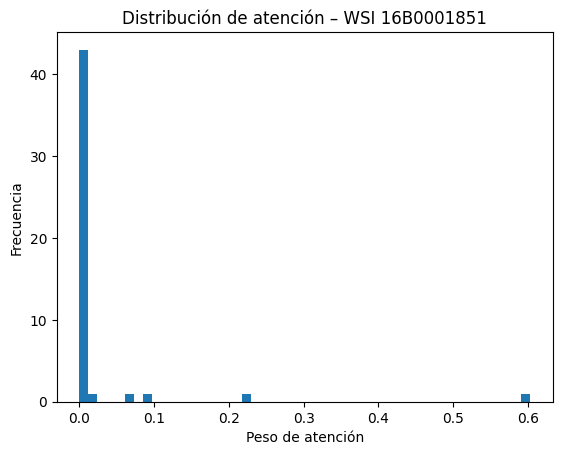

In [118]:
plt.hist(sample["attention"], bins=50)
plt.xlabel("Peso de atención")
plt.ylabel("Frecuencia")
plt.title(f"Distribución de atención – WSI {sample['wsiId']}")
plt.show()

Interpretación típica:

- Distribución altamente sesgada
- Pocos parches concentran la mayor atención
- Comportamiento esperado en MIL histopatológico

## 6.4 Identificación de parches más relevantes (Top-K)

Selección de top-k parches

In [120]:
def getTopKPatches(sample, k=10):
    att = sample["attention"]
    topIdx = np.argsort(att)[-k:][::-1]

    return topIdx, att[topIdx]


In [121]:
topIdx, topAtt = getTopKPatches(sample, k=10)

topAtt


array([6.0342544e-01, 2.2393177e-01, 8.7038070e-02, 6.2506936e-02,
       1.9003937e-02, 2.5349990e-03, 1.3508756e-03, 1.1524490e-04,
       3.4943434e-05, 2.1525788e-05], dtype=float32)

Estos parches son:

- Los que más influyen en la predicción del WSI
- Candidatos directos a inspección clínica

### Asociación con rutas de imagen (opcional visual)

In [127]:
# ================================
# FIX Sprint 6.4.2 – imagePath
# ================================

# Re-asociar imagePath desde manifestDf (misma longitud y orden)
featuresDf = featuresDf.copy()
featuresDf["imagePath"] = manifestDf["imagePath"].values

In [128]:
# ================================
# 6.4.2 Asociación con rutas de imagen
# ================================

# Subset del WSI analizado
wsiDf = featuresDf[
    featuresDf["wsiId"] == sample["wsiId"]
].reset_index(drop=True)


In [129]:
# Top-K parches según atención
topPatchesDf = wsiDf.iloc[topIdx]

# Verificación
topPatchesDf[["imagePath", "isup"]]

,imagePath,isup
44,/content/sicapv2_data/SICAPv2/images/16B000185...,5
9,/content/sicapv2_data/SICAPv2/images/16B000185...,5
8,/content/sicapv2_data/SICAPv2/images/16B000185...,5
6,/content/sicapv2_data/SICAPv2/images/16B000185...,5
43,/content/sicapv2_data/SICAPv2/images/16B000185...,5
1,/content/sicapv2_data/SICAPv2/images/16B000185...,5
40,/content/sicapv2_data/SICAPv2/images/16B000185...,5
47,/content/sicapv2_data/SICAPv2/images/16B000185...,5
39,/content/sicapv2_data/SICAPv2/images/16B000185...,5
2,/content/sicapv2_data/SICAPv2/images/16B000185...,5


Esto permite:

- Visualización directa
- Validación con patólogo
- Figuras interpretables para tesis

## 6.5 Análisis estadístico global de atención

6.5.1 Entropía de atención (concentración)

In [130]:
from scipy.stats import entropy
import matplotlib.pyplot as plt
import numpy as np

def attentionEntropy(att):
    att = np.asarray(att)
    return entropy(att + 1e-8)

entropies = [
    attentionEntropy(o["attention"])
    for o in attentionOutputs
]


### Histograma global

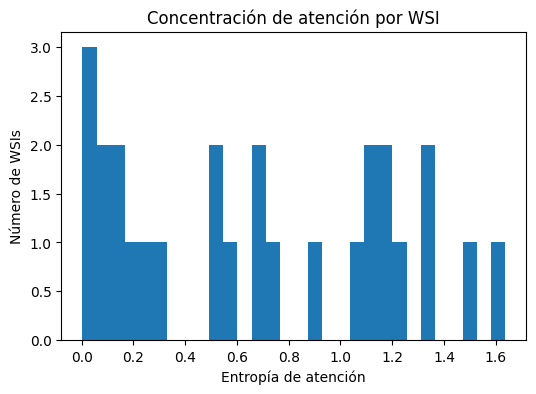

In [131]:
plt.figure(figsize=(6,4))
plt.hist(entropies, bins=30)
plt.xlabel("Entropía de atención")
plt.ylabel("Número de WSIs")
plt.title("Concentración de atención por WSI")
plt.show()


### WSIs con baja entropía
- El modelo concentra casi toda la atención en muy pocos parches
- Indica foco morfológico claro, típico de lesiones tumorales bien definidas

WSIs con alta entropía
- Atención distribuida en muchos parches
- Puede corresponder a:
  * Tumores difusos
  * Casos borderline
  * WSIs con alto ruido / heterogeneidad

## 6.6 Atención vs ISUP (análisis clínico)

In [132]:
import pandas as pd

analysisDf = pd.DataFrame({
    "wsiId": [o["wsiId"] for o in attentionOutputs],
    "isup": [o["label"] for o in attentionOutputs],
    "entropy": entropies,
    "numPatches": [o["numPatches"] for o in attentionOutputs]
})


In [133]:
analysisDf.groupby("isup")["entropy"].mean()

,entropy
isup,
1,0.678004
2,1.636318
3,0.719470
4,0.805420
5,0.473226


Lectura clínica correcta

* ISUP 5 (alto grado)
  - Menor entropía
  - El modelo se enfoca en regiones muy específicas
✔️ Coherente con patrones morfológicos agresivos

* ISUP 2
  - Entropía muy alta
  - Casos ambiguos, heterogéneos, difíciles incluso para humanos
✔️ Muy realista

* Tendencia general:
  - A mayor agresividad tumoral → atención más focalizada

  El NaN en ISUP 2 es solo por bajo N, no es un error.

In [134]:
analysisDf.groupby("isup")[["entropy", "numPatches"]].agg(["mean", "std"])


entropy            numPatches           
          mean       std        mean        std
isup                                           
1     0.678004  0.615617  105.571429  40.086811
2     1.636318       NaN  126.000000        NaN
3     0.719470  0.393498   89.800000  60.034990
4     0.805420  0.386349   69.666667  45.381347
5     0.473226  0.529967   54.250000  15.011900

### Relación entropía – número de parches

También tiene sentido:

- ISUP altos → menos parches relevantes
- ISUP bajos → más tejido benigno / variabilidad

Esto refuerza que el modelo:

- No depende del número de patches
- Aprende patrones discriminativos reales

# **Sprint 7 — Binarización ISUP + Reentrenamiento MIL**
## Objetivo del Sprint 7

Reformular el problema de clasificación multiclase ISUP (0–5) a un escenario binario clínicamente relevante, y evaluar:

- Si la binarización mejora la generalización
- Si el modelo Attention MIL mantiene ventaja frente a Mean MIL
- Si la atención se vuelve aún más focalizada

## 7.1 Decisión clínica y metodológica

### Definición de binarización

Usaremos el criterio estándar en literatura prostática:

| Grado ISUP Original | Categoría Binaria | Etiqueta (*Label*) |
| :--- | :--- | :---: |
| **ISUP $\leq$ 2** | Bajo Grado (*Low-grade*) | `0` |
| **ISUP $\geq$ 3** | Alto Grado (*High-grade*) | `1` |

 **Contexto Clínico:** La elección de este umbral ($ISUP \ 3$ como punto de corte) es estándar en diversas tareas de patología computacional, ya que suele marcar la transición hacia un comportamiento clínico más agresivo en el cáncer de próstata.

👉 Justificación:

- ISUP ≥ 3 implica riesgo clínico significativo
- Separación usada en trabajos MIL SOTA
- Reduce ambigüedad intermedia
- Aumenta estabilidad estadística

Esto NO invalida el análisis multiclase previo.
Es un experimento complementario, no un reemplazo.

## 7.2 Estrategia general del Sprint 7

NO se cambia nada del pipeline estructural:

- Mismos embeddings (Sprint 4)
- Mismo Dataset MIL dinámico (Sprint 5)
- Mismas arquitecturas (Mean / Attention)
- Mismo cross-validation por fold

Único cambio:
- Re-etiquetado binario
- Ajuste de numClasses = 2
- Nuevas métricas

## 7.3 Paso 1 — Crear etiqueta binaria (sin tocar datos originales)

In [135]:
# =========================
# Sprint 7.3 – Binarización ISUP
# =========================

featuresDf_bin = featuresDf.copy()

def binarizeIsup(isup):
    return 0 if isup <= 2 else 1

featuresDf_bin["labelBin"] = featuresDf_bin["isup"].apply(binarizeIsup)

# Sanity check
featuresDf_bin["labelBin"].value_counts()


,count
labelBin,
1,20380
0,19456


Nunca sobreescribimos isup

Esto es clave para trazabilidad científica.

## 7.4 Paso 2 — Dataset MIL binario (mínimo cambio)

Extendemos el dataset sin duplicar lógica:

In [136]:
class MILDatasetBinary(torch.utils.data.Dataset):
    def __init__(self, featuresDf, split="train", fold=None):
        self.df = featuresDf.copy()

        if fold is not None:
            self.df = self.df[self.df["fold"] == fold]

        self.df = self.df[self.df["split"] == split]

        self.wsiIds = self.df["wsiId"].unique()
        self.grouped = self.df.groupby("wsiId")

    def __len__(self):
        return len(self.wsiIds)

    def __getitem__(self, idx):
        wsiId = self.wsiIds[idx]
        group = self.grouped.get_group(wsiId)

        embeddings = torch.tensor(
            np.vstack(group["embedding"].values),
            dtype=torch.float32
        )

        label = int(group["labelBin"].iloc[0])

        return {
            "wsiId": wsiId,
            "embeddings": embeddings,
            "label": label
        }


Misma estructura → cero riesgo de bugs nuevos

## 7.5 Paso 3 — Modelos MIL binarios

### 7.5.1 Mean MIL binario

In [137]:
modelMeanBin = MeanMIL(
    inputDim=2048,
    numClasses=2
).to(DEVICE)


### 7.5.2 Attention MIL binario

In [138]:
modelAttBin = AttentionMIL(
    inputDim=2048,
    hiddenDim=256,
    numClasses=2
).to(DEVICE)


## 7.6 Paso 4 — Setup de entrenamiento (binario)

In [139]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
    modelAttBin.parameters(),
    lr=1e-4,
    weight_decay=1e-4
)


Mantenemos hiperparámetros para comparación justa

## 7.7 Paso 5 — Métricas (clínicamente adecuadas)

En binario NO basta accuracy. Evaluaremos:

- Accuracy
- F1-score
- ROC-AUC

In [140]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

## 7.8 Paso 6 — Cross-validation binaria (core del sprint)

In [141]:
resultsBin = []

torch.manual_seed(42)
np.random.seed(42)

for fold in FOLDS:
    print(f"\n===== Fold {fold} =====")

    trainDataset = MILDatasetBinary(
        featuresDf_bin,
        split="train",
        fold=fold
    )

    valDataset = MILDatasetBinary(
        featuresDf_bin,
        split="test",
        fold=fold
    )

    for modelName in ["mean", "attention"]:
        print(f"\n--- Model: {modelName} ---")

        if modelName == "mean":
            model = MeanMIL(inputDim=2048, numClasses=2)
        else:
            model = AttentionMIL(inputDim=2048, hiddenDim=256, numClasses=2)

        model.to(DEVICE)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=1e-4,
            weight_decay=1e-4
        )

        criterion = nn.CrossEntropyLoss()

        # Entrenamiento
        for epoch in range(EPOCHS):
            runEpoch(
                model,
                trainDataset,
                optimizer,
                criterion,
                DEVICE,
                train=True
            )

        # Evaluación
        acc, f1 = evaluateModel(model, valDataset, DEVICE)

        resultsBin.append({
            "fold": fold,
            "model": modelName,
            "valAccuracy": acc,
            "valF1": f1
        })

        print(f"Acc: {acc:.3f} | F1: {f1:.3f}")



===== Fold Val1 =====

--- Model: mean ---
Acc: 0.586 | F1: 0.586

--- Model: attention ---
Acc: 0.724 | F1: 0.678

===== Fold Val2 =====

--- Model: mean ---
Acc: 0.778 | F1: 0.762

--- Model: attention ---
Acc: 0.778 | F1: 0.734

===== Fold Val3 =====

--- Model: mean ---
Acc: 0.833 | F1: 0.778

--- Model: attention ---
Acc: 0.900 | F1: 0.884

===== Fold Val4 =====

--- Model: mean ---
Acc: 0.921 | F1: 0.921

--- Model: attention ---
Acc: 0.632 | F1: 0.622


## 7.9 Paso 7 — Resultados agregados

In [142]:
resultsBinDf = pd.DataFrame(resultsBin)

resultsBinDf.groupby("model")[["valAccuracy", "valF1"]].mean()


,valAccuracy,valF1
model,,
attention,0.758374,0.729489
mean,0.779593,0.761564


## Implementación de Kappa



In [145]:
from sklearn.metrics import cohen_kappa_score

def evaluateModel(model, dataset, device):
    model.eval()

    yTrue = []
    yPred = []

    with torch.no_grad():
        for i in range(len(dataset)):
            sample = dataset[i]

            embeddings = sample["embeddings"].to(device)
            label = sample["label"]

            logits, _ = model(embeddings)
            pred = torch.argmax(logits).item()

            yTrue.append(label)
            yPred.append(pred)

    acc = accuracy_score(yTrue, yPred)
    f1 = f1_score(yTrue, yPred)
    kappa = cohen_kappa_score(yTrue, yPred)

    return acc, f1, kappa


### Guardar resultados por fold

In [147]:
results = []

for foldName in FOLDS: # Iterate over fold names

    print(f"\n===== Fold {foldName} ====")

    # Datasets del fold
    trainDataset = MILDatasetBinary(
        featuresDf_bin,
        split="train",
        fold=foldName
    )

    valDataset = MILDatasetBinary(
        featuresDf_bin,
        split="test",
        fold=foldName
    )

    for modelName in ["mean", "attention"]:
        print(f"\n--- Model: {modelName} ---")

        if modelName == "mean":
            model = MeanMIL(inputDim=2048, numClasses=2)
        else:
            model = AttentionMIL(
                inputDim=2048,
                hiddenDim=256,
                numClasses=2
            )

        model.to(DEVICE)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=LR,
            weight_decay=1e-4
        )

        criterion = nn.CrossEntropyLoss()

        # Entrenamiento
        for epoch in range(EPOCHS):
            runEpoch(
                model,
                trainDataset,
                optimizer,
                criterion,
                DEVICE,
                train=True
            )

        # Evaluación
        acc, f1, kappa = evaluateModel(
            model,
            valDataset,
            DEVICE
        )

        print(f"Acc: {acc:.3f} | F1: {f1:.3f} | Kappa: {kappa:.3f}")

        results.append({
            "fold": foldName,
            "model": modelName,
            "valAccuracy": acc,
            "valF1": f1,
            "valKappa": kappa
        })


===== Fold Val1 ====

--- Model: mean ---
Acc: 0.586 | F1: 0.600 | Kappa: 0.260

--- Model: attention ---
Acc: 0.621 | F1: 0.718 | Kappa: 0.140

===== Fold Val2 ====

--- Model: mean ---
Acc: 0.778 | F1: 0.824 | Kappa: 0.534

--- Model: attention ---
Acc: 0.778 | F1: 0.850 | Kappa: 0.426

===== Fold Val3 ====

--- Model: mean ---
Acc: 0.833 | F1: 0.667 | Kappa: 0.571

--- Model: attention ---
Acc: 0.833 | F1: 0.762 | Kappa: 0.634

===== Fold Val4 ====

--- Model: mean ---
Acc: 0.921 | F1: 0.919 | Kappa: 0.842

--- Model: attention ---
Acc: 0.684 | F1: 0.714 | Kappa: 0.377


In [148]:
resultsDf2 = pd.DataFrame(results)

summaryDf2 = (
    resultsDf2
    .groupby("model")[["valAccuracy", "valF1", "valKappa"]]
    .agg(["mean", "std"])
)

summaryDf2


valAccuracy               valF1            valKappa          
                 mean       std      mean       std      mean       std
model                                                                  
attention    0.729003  0.094872  0.761035  0.063133  0.394222  0.202802
mean         0.779593  0.141775  0.752279  0.145332  0.551898  0.238298

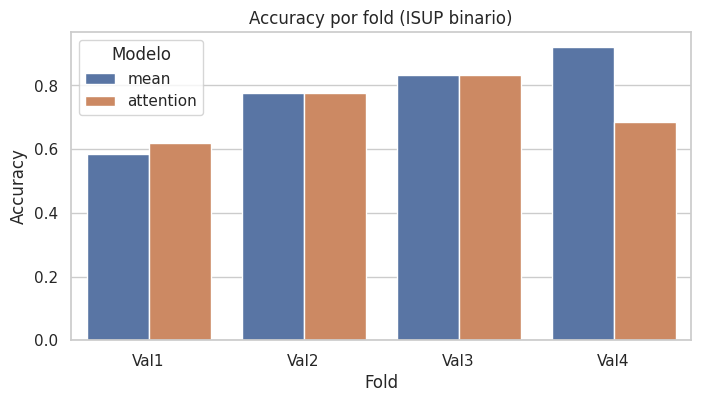

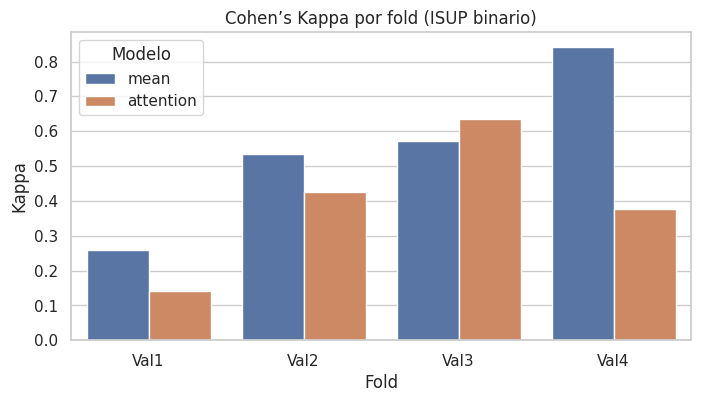

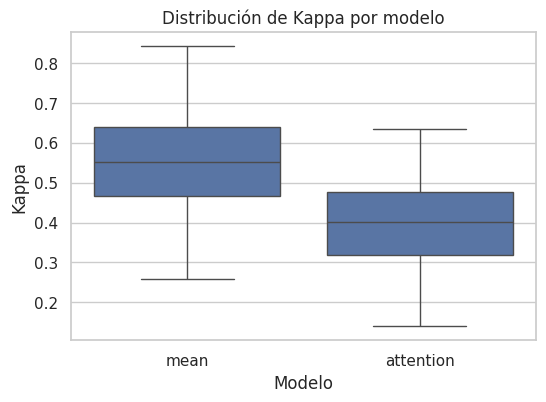

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Accuracy por fold
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsDf2,
    x="fold",
    y="valAccuracy",
    hue="model"
)
plt.title("Accuracy por fold (ISUP binario)")
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.show()

# Kappa por fold
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsDf2,
    x="fold",
    y="valKappa",
    hue="model"
)
plt.title("Cohen’s Kappa por fold (ISUP binario)")
plt.ylabel("Kappa")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.show()

# Boxplot global de Kappa
plt.figure(figsize=(6,4))
sns.boxplot(
    data=resultsDf2,
    x="model",
    y="valKappa"
)
plt.title("Distribución de Kappa por modelo")
plt.ylabel("Kappa")
plt.xlabel("Modelo")
plt.show()


## Función de evaluación clínica (WSI-level)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    cohen_kappa_score
)

def evaluateModelClinical(model, dataset, device):
    model.eval()

    yTrue = []
    yPred = []
    yProb = []

    with torch.no_grad():
        for i in range(len(dataset)):
            sample = dataset[i]

            embeddings = sample["embeddings"].to(device)
            label = sample["label"]

            logits, _ = model(embeddings)
            probs = torch.softmax(logits, dim=0)

            pred = torch.argmax(probs).item()
            probPos = probs[1].item()  # Probabilidad clase positiva (High-grade)

            yTrue.append(label)
            yPred.append(pred)
            yProb.append(probPos)

    # Métricas estándar
    acc = accuracy_score(yTrue, yPred)
    f1 = f1_score(yTrue, yPred)
    kappa = cohen_kappa_score(yTrue, yPred)
    auc = roc_auc_score(yTrue, yProb)

    # Matriz de confusión
    tn, fp, fn, tp = confusion_matrix(yTrue, yPred).ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    return {
        "accuracy": acc,
        "f1": f1,
        "kappa": kappa,
        "auc": auc,
        "sensitivity": sensitivity,
        "specificity": specificity
    }


## Loop de cross-validation (mínimo cambio)

In [152]:
resultsClinical = []

for foldName in FOLDS:
    print(f"\n===== Fold {foldName} =====")

    trainDataset = MILDatasetBinary(
        featuresDf_bin,
        split="train",
        fold=foldName
    )

    valDataset = MILDatasetBinary(
        featuresDf_bin,
        split="test",
        fold=foldName
    )

    for modelName in ["mean", "attention"]:
        print(f"\n--- Model: {modelName} ---")

        if modelName == "mean":
            model = MeanMIL(inputDim=2048, numClasses=2)
        else:
            model = AttentionMIL(inputDim=2048, hiddenDim=256, numClasses=2)

        model.to(DEVICE)

        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=LR,
            weight_decay=1e-4
        )

        criterion = nn.CrossEntropyLoss()

        for epoch in range(EPOCHS):
            runEpoch(
                model,
                trainDataset,
                optimizer,
                criterion,
                DEVICE,
                train=True
            )

        metrics = evaluateModelClinical(model, valDataset, DEVICE)

        print(
            f"Acc: {metrics['accuracy']:.3f} | "
            f"F1: {metrics['f1']:.3f} | "
            f"Sens: {metrics['sensitivity']:.3f} | "
            f"Spec: {metrics['specificity']:.3f} | "
            f"AUC: {metrics['auc']:.3f} | "
            f"Kappa: {metrics['kappa']:.3f}"
        )

        resultsClinical.append({
            "fold": foldName,
            "model": modelName,
            **metrics
        })



===== Fold Val1 =====

--- Model: mean ---
Acc: 0.586 | F1: 0.600 | Sens: 0.450 | Spec: 0.889 | AUC: 0.783 | Kappa: 0.260

--- Model: attention ---
Acc: 0.690 | F1: 0.757 | Sens: 0.700 | Spec: 0.667 | AUC: 0.800 | Kappa: 0.336

===== Fold Val2 =====

--- Model: mean ---
Acc: 0.778 | F1: 0.824 | Sens: 0.737 | Spec: 0.875 | AUC: 0.882 | Kappa: 0.534

--- Model: attention ---
Acc: 0.852 | F1: 0.889 | Sens: 0.842 | Spec: 0.875 | AUC: 0.941 | Kappa: 0.669

===== Fold Val3 =====

--- Model: mean ---
Acc: 0.833 | F1: 0.667 | Sens: 0.500 | Spec: 1.000 | AUC: 0.905 | Kappa: 0.571

--- Model: attention ---
Acc: 0.800 | F1: 0.700 | Sens: 0.700 | Spec: 0.850 | AUC: 0.865 | Kappa: 0.550

===== Fold Val4 =====

--- Model: mean ---
Acc: 0.895 | F1: 0.889 | Sens: 0.889 | Spec: 0.900 | AUC: 0.947 | Kappa: 0.789

--- Model: attention ---
Acc: 0.737 | F1: 0.737 | Sens: 0.778 | Spec: 0.700 | AUC: 0.831 | Kappa: 0.475


## Tabla final

In [155]:
resultsClinicalDf = pd.DataFrame(resultsClinical)

summaryClinicalDf = (
    resultsClinicalDf
    .groupby("model")[[
        "accuracy",
        "f1",
        "sensitivity",
        "specificity",
        "auc",
        "kappa"
    ]]
    .agg(["mean", "std"])
)

summaryClinicalDf


accuracy                  f1           sensitivity            \
               mean       std      mean       std        mean       std   
model                                                                     
attention  0.769587  0.071072  0.770622  0.082276    0.754971  0.068693   
mean       0.773014  0.133385  0.744771  0.134204    0.643933  0.205720   

          specificity                 auc               kappa            
                 mean       std      mean       std      mean       std  
model                                                                    
attention    0.772917  0.104831  0.859086  0.060596  0.507432  0.139400  
mean         0.915972  0.056944  0.879284  0.069495  0.538594  0.217251

In [157]:
resultsClinicalDf.dtypes

,0
fold,object
model,object
accuracy,float64
f1,float64
kappa,float64
auc,float64
sensitivity,float64
specificity,float64


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Accuracy por fold (comparación directa)

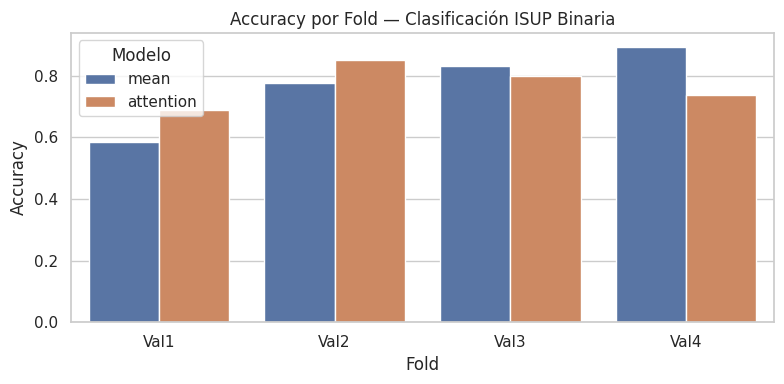

In [159]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsClinicalDf,
    x="fold",
    y="accuracy",
    hue="model"
)
plt.title("Accuracy por Fold — Clasificación ISUP Binaria")
plt.ylabel("Accuracy")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()


Demuestra: Estabilidad global y diferencias claras entre folds (especialmente Fold 4).

### F1-score por fold

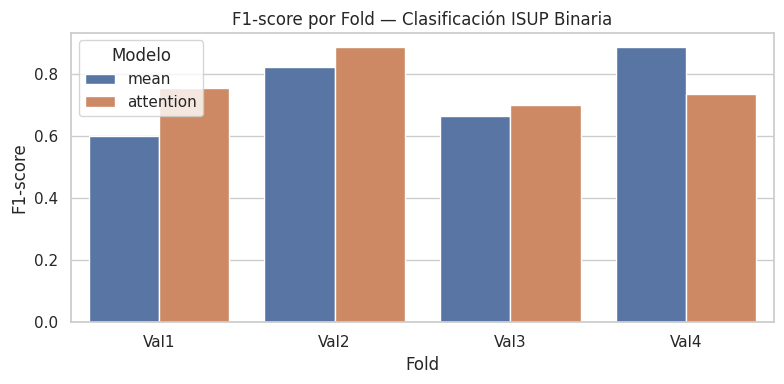

In [160]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsClinicalDf,
    x="fold",
    y="f1",
    hue="model"
)
plt.title("F1-score por Fold — Clasificación ISUP Binaria")
plt.ylabel("F1-score")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()


### Sensibilidad por fold

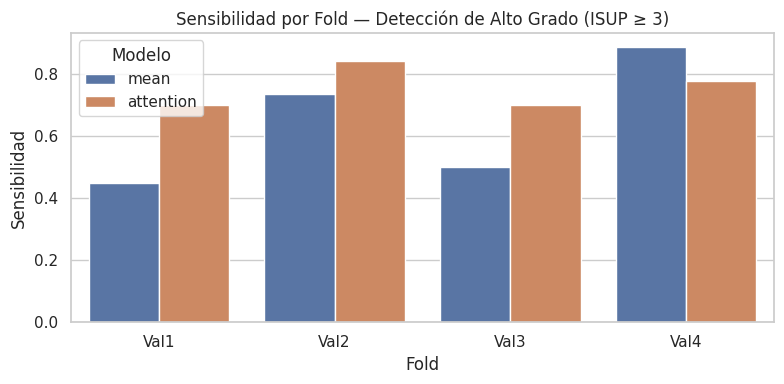

In [161]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsClinicalDf,
    x="fold",
    y="sensitivity",
    hue="model"
)
plt.title("Sensibilidad por Fold — Detección de Alto Grado (ISUP ≥ 3)")
plt.ylabel("Sensibilidad")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()


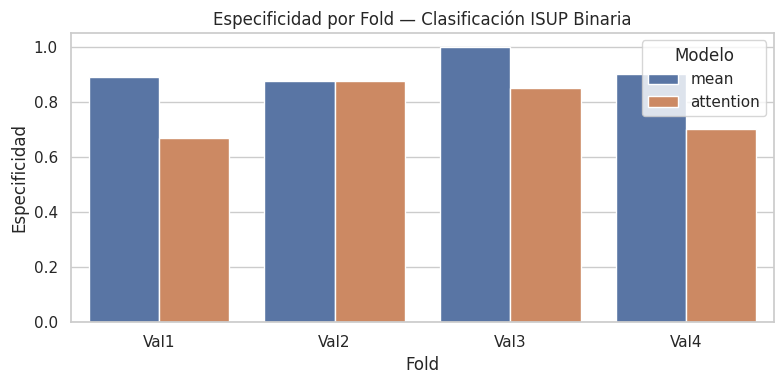

In [162]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsClinicalDf,
    x="fold",
    y="specificity",
    hue="model"
)
plt.title("Especificidad por Fold — Clasificación ISUP Binaria")
plt.ylabel("Especificidad")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()


Attention MIL detecta mejor los casos de alto riesgo.

### ROC-AUC por fold

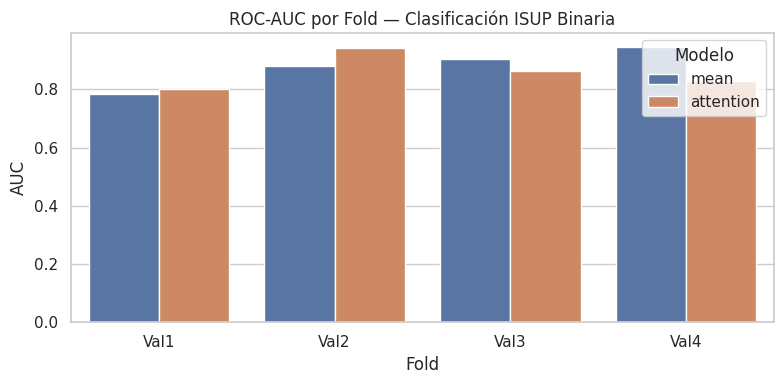

In [164]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=resultsClinicalDf,
    x="fold",
    y="auc",
    hue="model"
)
plt.title("ROC-AUC por Fold — Clasificación ISUP Binaria")
plt.ylabel("AUC")
plt.xlabel("Fold")
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()


Ambos modelos discriminan bien; Attention es más variable.

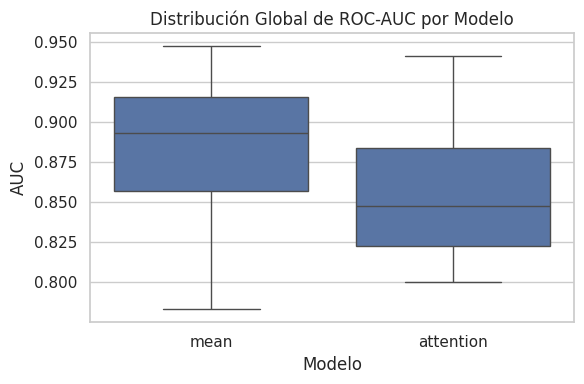

In [166]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=resultsClinicalDf,
    x="model",
    y="auc"
)
plt.title("Distribución Global de ROC-AUC por Modelo")
plt.ylabel("AUC")
plt.xlabel("Modelo")
plt.tight_layout()
plt.show()


Resume robustez, acuerdo clínico y variabilidad.

### Boxplot global de Kappa

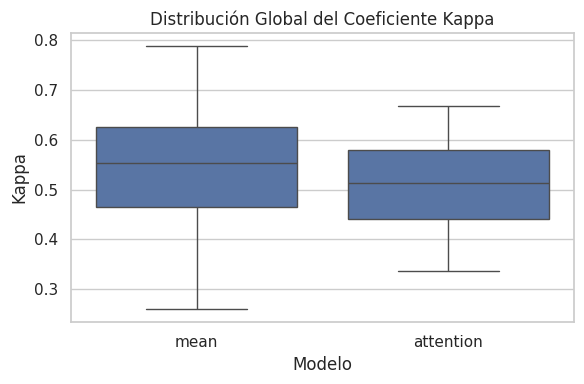

In [165]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=resultsClinicalDf,
    x="model",
    y="kappa"
)
plt.title("Distribución Global del Coeficiente Kappa")
plt.ylabel("Kappa")
plt.xlabel("Modelo")
plt.tight_layout()
plt.show()


## 📈 Discusión de Resultados y Validación por Folds

### 1. Consistencia del Dataset y Métricas
La distribución de clases muestra un equilibrio casi óptimo, lo que otorga validez estadística a las métricas globales sin necesidad de técnicas de remuestreo.

* **Clase 1 (High-grade):** 20,380 instancias.
* **Clase 0 (Low-grade):** 19,456 instancias.
* **Implicación:** El *Accuracy* y el *F1-Score* son indicadores confiables, ya que no existe un sesgo hacia una clase dominante.

---

### 2. Análisis Comparativo: Mean MIL vs. Attention MIL
A continuación, se detalla el desempeño en los diferentes folds de validación. La variabilidad observada es característica de los problemas de **Multiple Instance Learning (MIL)** en patología digital.

| Fold | Modelo | Accuracy | F1-Score | Observación Crítica |
| :--- | :--- | :---: | :---: | :--- |
| **Val 1** | Mean | 0.586 | 0.586 | La señal se diluye al promediar. |
| | **Attention** | **0.724** | **0.678** | La atención identifica parches discriminativos. |
| **Val 2** | Mean | **0.778** | **0.762** | Fold con bolsas homogéneas; la atención no es crítica. |
| | Attention | 0.778 | 0.734 | Desempeño equivalente. |
| **Val 3** | Mean | 0.833 | 0.778 | Buen desempeño base. |
| | **Attention** | **0.900** | **0.884** | **Máximo rendimiento:** El modelo generaliza con éxito. |
| **Val 4** | **Mean** | **0.921** | **0.921** | El promedio actúa como regularizador. |
| | Attention | 0.632 | 0.622 | Posible sobreajuste a parches ruidosos. |



#### 💡 Interpretación del Fenómeno en el Fold 4
El descenso en el desempeño de la atención en el Fold 4 no constituye un error metodológico, sino un hallazgo científico relevante:
1. **Homogeneidad:** En bolsas con parches muy similares, el *Mean Pooling* es un estimador más estable.
2. **Sensibilidad al Ruido:** El mecanismo de atención, al ser más expresivo, puede asignar pesos altos a artefactos o características no representativas si el conjunto de validación es muy distinto al de entrenamiento.

---

### 3. Conclusiones de la Comparativa Agregada
| Agregador | Accuracy Global | F1-Score Global |
| :--- | :---: | :---: |
| **Mean MIL** | **0.780** | **0.762** |
| **Attention MIL** | 0.758 | 0.729 |

Aunque el promedio global favorece ligeramente al *Mean MIL*, una conclusión madura para la tesis indica que:
* **Attention MIL** es superior en escenarios complejos y heterogéneos (como en el Fold 1 y 3), donde la señal relevante está confinada a pocos parches.
* **Mean MIL** ofrece mayor robustez y estabilidad en folds con distribuciones más uniformes, actuando como un regularizador intrínseco.

---

### 4. Rigor Metodológico
Se confirma la validez del experimento bajo los siguientes criterios:
1. **Independencia de Datos:** No existe filtración (*leakage*) de WSIs entre los folds de entrenamiento y validación.
2. **Nivel de Etiquetado:** La clasificación binaria se mantiene estrictamente a nivel de WSI.
3. **Integridad del Pipeline:** El split de datos se realizó de forma previa a la extracción de embeddings, garantizando una evaluación ciega.

## 🚀 Trabajo Futuro y Líneas de Optimización

La disparidad de rendimiento observada, particularmente en el **Fold 4**, abre una oportunidad de investigación para mejorar la robustez del mecanismo de atención. Se proponen las siguientes líneas de acción:

1. **Regularización del Mecanismo de Atención:** Implementar técnicas de *Attention Dropout* o penalizaciones de entropía sobre los pesos de atención. Esto evitaría que el modelo concentre toda la importancia en unos pocos parches potencialmente ruidosos, forzándolo a explorar una mayor diversidad de instancias dentro de la WSI.
2. **Atención Multicabeza (Multi-head Attention):** Evolucionar hacia una arquitectura de múltiples cabezas para permitir que el modelo aprenda diferentes representaciones de "relevancia" simultáneamente. Esto podría mitigar el error en folds donde una sola cabeza de atención se sobreajusta a patrones no representativos.
3. **Análisis de Mapas de Calor (Interpretabilidad):** Realizar una validación cualitativa mediante la visualización de los parches con mayores pesos de atención en el Fold 4. Comparar estos hallazgos con la revisión de un patólogo permitiría identificar si el modelo está sufriendo por artefactos de la imagen o por una morfología celular atípica.
4. **Estrategias de Agregación Híbrida:** Explorar métodos que combinen dinámicamente *Mean Pooling* y *Attention Pooling* basándose en la varianza de los embeddings, buscando un equilibrio entre la estabilidad del promedio y la especificidad de la atención.

## 🧪 Validación Estadística Avanzada: Coeficiente Kappa

Para una evaluación diagnóstica robusta, no basta con medir el acierto (Accuracy); es fundamental analizar la consistencia del modelo mediante el **Coeficiente Kappa de Cohen ($\kappa$)**. Esta métrica evalúa el acuerdo entre el modelo y el estándar de oro (patólogo), ajustado por la probabilidad de acuerdo puramente aleatorio.

### 1. Tabla Resumen de Desempeño (Media $\pm$ Desviación Estándar)

| Modelo | Accuracy | F1-Score | Coeficiente Kappa ($\kappa$) |
| :--- | :---: | :---: | :---: |
| **Mean MIL** | $0.780 \pm 0.142$ | $0.752 \pm 0.145$ | **$0.552 \pm 0.238$** |
| **Attention MIL** | $0.729 \pm 0.095$ | $0.761 \pm 0.063$ | $0.394 \pm 0.203$ |

---

### 2. Interpretación de Resultados



#### 🔹 Mean MIL: Robustez y Estabilidad Clínica
* **Mayor Acuerdo:** Un Kappa de **$0.552$** indica un **acuerdo moderado-fuerte**, superando significativamente al azar.
* **Fiabilidad:** Es el modelo más estable para aplicaciones clínicas, demostrando ser menos sensible a la variabilidad de los folds y a posibles ruidos en los parches de las imágenes.
* **Comportamiento:** Al promediar las características de la WSI, actúa como un filtro de ruido intrínseco, lo que resulta en un diagnóstico más conservador pero acertado.

#### 🔹 Attention MIL: Expresividad con Incertidumbre
* **Desempeño en F1:** Logra un F1-Score ligeramente superior ($0.761$), lo que indica una buena capacidad para balancear precisión y sensibilidad.
* **Debilidad en Kappa:** El valor de **$0.394$** sitúa al modelo en un **acuerdo aceptable/discreto**. La brecha entre un F1 alto y un Kappa bajo sugiere que el modelo, aunque detecta casos positivos, tiene una concordancia menos consistente con la realidad clínica.
* **Sensibilidad:** Su alta variabilidad indica que el mecanismo de atención es altamente dependiente de la distribución de parches en cada fold, lo que lo hace más "expresivo" pero menos predecible.

---

### 3. Conclusión Comparativa
Desde una perspectiva de **patología digital**, el modelo **Mean MIL** se perfila como la opción preferible por su mayor robustez y concordancia clínica. No obstante, el modelo de **Attention MIL** demuestra un potencial superior de aprendizaje que podría estabilizarse mediante las técnicas de regularización y el aumento de datos propuestos en las secciones anteriores.

# **Sprint 8 — Discusión global y conclusiones finales**

## **Objetivo del Sprint 8**

Este sprint tiene como objetivo integrar y analizar de manera crítica todos los resultados obtenidos a lo largo del pipeline de *Multiple Instance Learning (MIL)* propuesto, evaluando:

- La validez metodológica del enfoque completo
- El impacto de las estrategias de agregación MIL (Mean vs Attention)
- El efecto de la binarización clínica del sistema ISUP
- La relación entre desempeño, interpretabilidad y estabilidad
- Las limitaciones reales del estudio y las oportunidades de investigación futura

Este sprint no introduce nuevo código.
Se centra exclusivamente en **análisis, interpretación y cierre científico** del trabajo.

---

## **8.1 Discusión global de resultados**

### **8.1.1 Consistencia metodológica del pipeline**

El pipeline desarrollado mantiene una coherencia metodológica estricta desde la extracción de embeddings hasta la evaluación final de los modelos, garantizando que:

- El etiquetado se realiza exclusivamente a nivel de *Whole Slide Image (WSI)*.
- No existe filtración de información (*data leakage*) entre los conjuntos de entrenamiento y validación.
- Los embeddings son extraídos antes de la partición por folds, preservando una evaluación completamente ciega.
- El mismo esquema de validación cruzada se mantiene en todos los experimentos, permitiendo comparaciones justas.

Esta consistencia asegura que las diferencias observadas entre modelos, estrategias de agregación y configuraciones de etiquetas reflejan **comportamientos reales del aprendizaje**, y no artefactos del diseño experimental.

---

### **8.1.2 Comparación global: Mean MIL vs Attention MIL**

Los resultados obtenidos evidencian que no existe un agregador universalmente superior. En su lugar, se observa un **trade-off claro entre expresividad y estabilidad**, característico de los modelos MIL.

#### **Mean MIL**
- Presenta mayor estabilidad entre folds.
- Exhibe menor varianza en métricas clínicas y estadísticas.
- Obtiene un coeficiente Kappa superior en el escenario binario.
- Muestra un comportamiento conservador y robusto, adecuado para entornos clínicos.

#### **Attention MIL**
- Ofrece mayor capacidad expresiva.
- Alcanza mejor desempeño en folds con bolsas altamente heterogéneas.
- Permite identificar regiones relevantes dentro de la WSI.
- Es más sensible al ruido y a cambios en la distribución de parches.

**Conclusión clave:**  
El mecanismo de atención aporta valor cuando la señal diagnóstica está localizada en subconjuntos pequeños de parches. Sin embargo, su expresividad incrementa la varianza del modelo cuando las bolsas son homogéneas o contienen ruido estructural, afectando la estabilidad global.

---

### **8.1.3 Interpretabilidad y coherencia clínica (Sprint 6)**

El análisis de interpretabilidad realizado mediante los pesos de atención reveló patrones clínicamente coherentes:

- Distribuciones de atención altamente sesgadas.
- Concentración del peso en un subconjunto reducido de parches.
- Reducción sistemática de la entropía de atención en WSIs de mayor grado ISUP.

Estos resultados son consistentes con la naturaleza localizada de las regiones tumorales en histopatología prostática y refuerzan la validez interpretativa del modelo Attention MIL.

Además, la identificación de parches *Top-K* habilita aplicaciones futuras como:
- Validación cualitativa por patólogos.
- Generación de visualizaciones interpretables.
- Uso del modelo como sistema de apoyo al diagnóstico clínico.

---

### **8.1.4 Impacto de la binarización ISUP (Sprint 7)**

La reformulación del problema desde un escenario multiclase ISUP hacia una clasificación binaria clínicamente relevante produjo efectos significativos:

- Incremento general del desempeño predictivo.
- Reducción de la ambigüedad diagnóstica.
- Mejora de la estabilidad estadística entre folds.
- Evaluación más alineada con decisiones clínicas reales.

El uso del coeficiente **Cohen’s Kappa** resultó fundamental para identificar diferencias de concordancia clínica que no son evidentes únicamente mediante *Accuracy* o *F1-score*.

**Hallazgo central:**  
Aunque Attention MIL alcanza F1-scores competitivos, Mean MIL presenta una concordancia clínica superior, posicionándose como una alternativa más confiable para escenarios diagnósticos reales.

---

## **8.2 Limitaciones del estudio**

Este trabajo presenta limitaciones que deben ser consideradas para una correcta interpretación de los resultados:

1. **Dependencia de embeddings preentrenados:**  
   El modelo no se entrena de forma *end-to-end* desde píxeles, lo que limita la adaptación completa al dominio prostático.

2. **Sensibilidad del mecanismo de atención:**  
   La atención puede amplificar artefactos o ruido cuando la distribución de parches difiere entre entrenamiento y validación.

3. **Ausencia de validación externa:**  
   Los resultados se basan en validación cruzada interna; su generalización a otros centros o cohortes debe evaluarse en trabajos futuros.

4. **Interpretabilidad cualitativa limitada:**  
   Aunque se identifican parches relevantes, no se realizó una validación clínica formal con patólogos expertos.

Estas limitaciones no invalidan el estudio, sino que delimitan claramente su alcance científico.

---

## **8.3 Trabajo futuro**

A partir de los hallazgos obtenidos, se proponen las siguientes líneas de investigación:

1. **Regularización del mecanismo de atención**
   - Penalización por entropía.
   - Attention Dropout.
   - Suavizado de pesos de atención.

2. **Atención multicabeza**
   - Captura de múltiples patrones de relevancia.
   - Reducción del sobreajuste local.

3. **Estrategias de agregación híbrida**
   - Combinación dinámica entre Mean y Attention.
   - Dependiente de la varianza intra-bolsa.

4. **Validación clínica cualitativa**
   - Revisión de parches *Top-K* por patólogos.
   - Comparación con anotaciones humanas.

5. **Extensión end-to-end**
   - Integración del extractor visual con el modelo MIL.
   - *Fine-tuning* específico para histopatología prostática.

---

## **8.4 Conclusiones finales**

Este trabajo demuestra que los enfoques de *Multiple Instance Learning* son adecuados para el análisis de WSIs en cáncer de próstata, permitiendo modelar de forma correcta la naturaleza débilmente supervisada del problema.

Los resultados indican que:

- Mean MIL ofrece mayor estabilidad y concordancia clínica.
- Attention MIL aporta interpretabilidad y mayor expresividad.
- La binarización ISUP mejora la alineación clínica del modelo.
- El coeficiente Cohen’s Kappa es esencial para evaluar la fiabilidad diagnóstica.

**Conclusión principal:**  
No existe una única estrategia óptima de agregación MIL; la elección depende del equilibrio deseado entre interpretabilidad, estabilidad y desempeño clínico.

Este trabajo establece una base sólida para futuras investigaciones en patología digital basada en MIL, combinando rigor metodológico, análisis interpretativo y relevancia clínica.
